In [168]:
### Investigate coeGenes characteristics with Info from Mostafavi Paper

# Libraries

In [169]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'"


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"


In [170]:
source('MS4_Plot_Config.r')

In [171]:
library(httr)

In [172]:
library(jsonlite)

# Parameters

In [173]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [174]:
data_path = '../data/current/coeqtl_mapping/'

In [175]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [176]:
coeqtl_results_path = 'co_qtls_decision_tree/'

In [177]:
meta_data_path  = "/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/meta-data/"

In [601]:
# Define cell-type for which enrichments should be calculated; alternative: All
cell_type = 'Mono'

# Data

## Expression info of genes

In [602]:
summary_stats_info = data.frame()

In [603]:
cell_types  = c('CD4_T', 'CD8_T', 'Mono', 'NK', 'B')

In [604]:
datasets_to_load = c('Franke_split_v2', 'Franke_split_v3', 'wijst2018', 'oneK1k', 'multiome')

In [605]:
for(i in datasets_to_load){
    for (j in cell_types){
        if(file.exists(paste0( "../data/current/summary_stats/D1_Sample_gene_statisticwg3_", i, j, ".Qced.Normalized.SCs.Rds.csv"))){
          
                result_file = fread( paste0( "../data/current/summary_stats/D1_Sample_gene_statisticwg3_", i, j, ".Qced.Normalized.SCs.Rds.csv")) # F12_Tests_after_filtering_normalized.csv --> after decision tree filtering; F3_decision_tree_input.csv

                result_file$dataset = i
                result_file$cell_type = j 
            
                ### aggregate on a gene level
                result_file = result_file %>% group_by(dataset, cell_type, gene) %>% summarise(amount_samples_non_zero = n(),
                                                                                 mean_amount_cells = mean(amount_cells),
                                                                                 mean_expression = mean(mean_counts),
                                                                                 mean_percentage_zero = mean(percentage_zero),
                                                                                 mean_non_zero_counts = mean(amount_non_zero_counts))
                #result_file$p_val_mt = NULL   # TBD: remove when this information has been added to all result files
                #result_file$q_val = NULL
                #result_file$co_egene = NULL
                summary_stats_info  = rbind(result_file, summary_stats_info )
    
            }
    }
    }
    

`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by '

In [606]:
head(summary_stats_info,2)

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,B,A1BG,5,219.0000,0.04113295,94.49146,10.4
multiome,B,A1BG-AS1,3,154.6667,0.04690375,93.49882,10.0


In [607]:
unique(summary_stats_info$cell_type)

[1] "B"     "NK"    "Mono"  "CD8_T" "CD4_T"

In [608]:
### Adjust the dataset info

In [609]:
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'wijst2018', 'wijst')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'Franke_split_v2', 'Franke_v2')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'Franke_split_v3', 'Franke_v3')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'oneK1k', 'oneK1K')

In [610]:
unique(summary_stats_info$dataset)

[1] "multiome"  "oneK1K"    "wijst"     "Franke_v3" "Franke_v2"

In [611]:
unique(summary_stats_info[,c('dataset', 'cell_type')]) %>% group_by(dataset) %>% dplyr::count()

dataset,n
<chr>,<int>
Franke_v2,5
Franke_v3,5
multiome,5
oneK1K,5
wijst,5


In [612]:
head(summary_stats_info,2)

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,B,A1BG,5,219.0000,0.04113295,94.49146,10.4
multiome,B,A1BG-AS1,3,154.6667,0.04690375,93.49882,10.0


In [613]:
summary_stats_info[(summary_stats_info$gene == 'A1BG') & (summary_stats_info$cell_type == 'CD4_T'),]

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,CD4_T,A1BG,113,549.8584,0.02652148,96.37977,18.04425
oneK1K,CD4_T,A1BG,1012,474.6630,0.10414159,90.48451,44.59091
wijst,CD4_T,A1BG,37,274.6757,0.09206075,91.33705,22.91892
Franke_v3,CD4_T,A1BG,47,357.6596,0.15977212,86.07066,51.08511
Franke_v2,CD4_T,A1BG,86,409.1395,0.08670870,91.87012,33.19767


In [614]:
### Calculate weighted mean expression per Gene)

In [615]:
summary_stats_info_meta = summary_stats_info %>% group_by(gene, cell_type) %>% summarise(weighted_mean_expression = sum((mean_expression * amount_samples_non_zero))/sum(amount_samples_non_zero))

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


In [616]:
if(cell_type != 'All'){
    summary_stats_info_meta = summary_stats_info_meta[summary_stats_info_meta$cell_type == cell_type ,]
    }

In [617]:
if(cell_type == 'All'){
    summary_stats_info_meta =  summary_stats_info_meta %>% group_by(gene) %>% summarise(weighted_mean_expression = mean(weighted_mean_expression))
    }

In [618]:
unique(summary_stats_info_meta$cell_type)

[1] "Mono"

In [619]:
head(summary_stats_info_meta,2)

gene,cell_type,weighted_mean_expression
<chr>,<chr>,<dbl>
A1BG,Mono,0.19266640
A1BG-AS1,Mono,0.02286316


## Mostafavi Paper Scores

In [620]:
### Scores for genes

In [621]:
paper_scores = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/pc_genes.txt")

In [622]:
head(paper_scores,2)

hgnc_id,GeneSymbol,gene,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,ABC_length_per_type,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
HGNC:14825,ENSG00000186092,OR4F5,0,6.166,0.981,0.030354,1.84,0,0,⋯,0,0,0,0,4,2,1,0,0,0.004438489
HGNC:15079,ENSG00000284662,OR4F16,11,0.938,0.939,NA,NA,0,0,⋯,0,0,0,0,4,2,1,0,NA,NA


In [623]:
length(unique(paper_scores$gene))

[1] 18328

In [624]:
### Scores for genes and GO term annotation

In [625]:
paper_scores_go = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/genes_multiGO.txt")

In [626]:
head(paper_scores_go,2)

gene,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile
<chr>,<int>,<int>,<int>
HGNC:100,67,0,1
HGNC:10000,127,4,9


## Significant results

In [627]:
sign_var = '' # Define which significant results to load

In [628]:
if(sign_var  == 'q_val'){
    coeqtls = fread(paste0('/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/coeqtl_mapping/co_qtls_decision_tree/shared_results/5DS_Meta_Analysis_Sign_coeQTLs133q_val_0.1.csv'))
    }
if(sign_var  != 'q_val'){
    coeqtls = fread(paste0('/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/coeqtl_mapping/co_qtls_decision_tree/shared_results/5DS_Meta_Analysis_Sign_coeQTLs133p_val_mt_eGene', '_.csv'))
    }

In [629]:
coeqtls = as.data.frame(coeqtls)

In [630]:
nrow(coeqtls)

[1] 91628

In [631]:
### Define whether to filter on specific cell-type or keep all coeqtls

In [632]:
if(cell_type != 'All'){
    coeqtls = coeqtls[ (coeqtls$cell_type == cell_type),]
    }

In [633]:
head(coeqtls,2)

,V1,snp_id,cell_type,eGene,coeGene,feature_id,triplet,dataset,n_samples,p_val_mt,⋯,eQTL_GO:MF,eQTL_REAC,eQTL_remap2022_1,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>
1,1,10:112347540:T:C,Mono,ACSL5,VIM,ACSL5_VIM,10:112347540:T:C;ACSL5_VIM,meta_5ds,337,3.996531,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
2,2,10:132255627:A:G,Mono,STK32C,SPN,SPN_STK32C,10:132255627:A:G;SPN_STK32C,meta_5ds,204,4.450337,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,


In [634]:
nrow(coeqtls)

[1] 4319

In [635]:
#sort(colnames(coeqtls))

## Tested eGenes and coeGenes

In [636]:
## Alt 1: load all genes per cell-type passing decision tree filter

In [637]:
## Load genes passing decision tree filter in the different datasets

In [638]:
cell_types = c( 'B', 'NK', 'Mono', 'CD8_T' , 'CD4_T')

In [639]:
gene_list = data.frame()

In [640]:
datasets_to_load = c('Franke_v2', 'Franke_v3', 'wijst', 'oneK1K', 'multiome')

In [641]:
for(j in datasets_to_load){
    for(i in cell_types){
        gene_list_input = fread(paste0(data_path, coeqtl_results_path , '/correlation_input/', 'F11_Decision_Tree_Geneswg3_',j,'_' , i, '.Qced.Normalized.SCs.Rds.tsv'), header = FALSE)
        gene_list_input$cell_type = i
        gene_list_input$dataset = j
        gene_list = rbind(gene_list, gene_list_input)
        }
    }

In [642]:
head(gene_list_input,2)

V1,cell_type,dataset
<chr>,<chr>,<chr>
A2M,CD4_T,multiome
A2M-AS1,CD4_T,multiome


In [643]:
gene_list = data.frame(gene_list)

In [644]:
### unique gene list per cell-type

In [645]:
 gene_list= unique( gene_list[,c('cell_type', 'V1')])

In [646]:
head( gene_list,2)

,cell_type,V1
,<chr>,<chr>
1,B,x
2,B,AC004687.1


In [647]:
colnames( gene_list) = c('cell_type', 'gene')

In [648]:
cell_type

[1] "Mono"

In [649]:
if(cell_type != 'All'){
    gene_list = gene_list[gene_list$cell_type == cell_type,]
    }

In [650]:
unique(gene_list$cell_type)

[1] "Mono"

# Exk: compare scores for Crispr Genes

In [66]:
crispr_data = fread(paste0(meta_data_path, "crispr/coeqtls_with_dir_concordance_mean_corr.tsv.gz"))

In [67]:
head(crispr_data,2)

feature_id,snp_id,eGene,coeGene,crispr_score,mean_corr_ref,mean_corr_alt,mean_corr,coeqtl_sign_mean_corr,crispr_concordance
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
RPS26_RPS28,12:56042145:C:G,RPS26,RPS28,-0.008112175,0.6676119,0.02654248,0.3885927,+,1
RPS26_RPS29,12:56083910:A:T,RPS26,RPS29,-0.034730197,0.6774554,0.04399220,0.3960291,+,1


In [74]:
amount_entries_per_egene = crispr_data %>% group_by(eGene) %>% dplyr::count() %>% arrange(-n)

In [75]:
nrow(crispr_data)

[1] 807

In [76]:
length(unique(crispr_data$feature_id))

[1] 807

In [77]:
length(unique(crispr_data$coeGene))

[1] 280

In [78]:
nrow(unique(crispr_data[,c('coeGene', 'crispr_concordance')]))

[1] 360

In [79]:
#### Define duplicate co-eGenes
duplicates = unique(crispr_data[,c('coeGene', 'crispr_concordance')]) %>% group_by(coeGene) %>% dplyr::count() %>% dplyr::filter(n >= 2)

In [80]:
#head(unique(crispr_data[,c('coeGene', 'crispr_concordance')]) %>% arrange(coeGene),20)

In [81]:
length(unique(crispr_data$eGene))

[1] 26

In [82]:
### Match connectivity scores

In [83]:
head(paper_scores,2)

<0 x 0 matrix>

In [84]:
### For coeGene
test_data = merge(crispr_data , paper_scores, by.x = 'coeGene', by.y = 'gene', all.x = TRUE)

Warning message in merge.data.table(crispr_data, paper_scores, by.x = "coeGene", :
"Input data.table 'y' has no columns."


ERROR: Error in merge.data.table(crispr_data, paper_scores, by.x = "coeGene", : Elements listed in `by.y` must be valid column names in y.


In [ ]:
nrow(test_data)

In [ ]:
nrow(test_data[is.na(test_data$promoter_count),])

In [ ]:
### For eGene

In [ ]:
test_data = merge(test_data , paper_scores, by.x = 'eGene', by.y = 'gene', all.x = TRUE)

In [85]:
head(test_data,2)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': object 'test_data' not found


In [152]:
#### Match mean expression

In [166]:
head(summary_stats_info_meta,2)

gene,weighted_mean_expression
<chr>,<dbl>
A1BG,0.13038935
A1BG-AS1,0.03941786


In [167]:
test_data = merge(test_data, summary_stats_info_meta, by.x = 'coeGene', by.y = 'gene')

In [168]:
nrow(test_data)

[1] 807

In [169]:
### Compare scores for co-eGenes

In [170]:
head(duplicates,2)

coeGene,n
<chr>,<int>
EIF3E,2
PFN1,2


In [171]:
## Get unique co-eGene observations that are not duplicates

In [182]:
coeGene_test_data = unique(test_data[!test_data$coeGene %in% duplicates$coeGene,c('crispr_concordance', 'connect_decile.x', 'connect_quantile.x', 'coeGene', 'PPI_degree_quantile.x', 'weighted_mean_expression')])

In [183]:
nrow(coeGene_test_data)

[1] 200

In [184]:
## Boxplot

Warning message:
"Removed 9 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 9 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


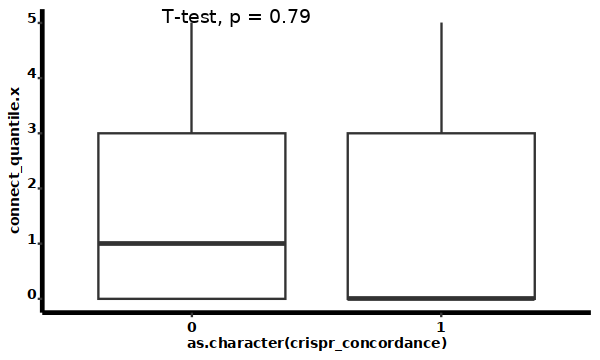

In [185]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(coeGene_test_data, aes(x=as.character(crispr_concordance), y=connect_quantile.x)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [186]:
coeGene_test_data %>% group_by(crispr_concordance) %>% summarise(mean_connect_quantile = mean(connect_quantile.x, na.rm = TRUE),
                                                         mean_PPI_degree_quantile = mean(PPI_degree_quantile.x, na.rm = TRUE))

crispr_concordance,mean_connect_quantile,mean_PPI_degree_quantile
<int>,<dbl>,<dbl>
0,1.719101,4.022472
1,1.647059,4.245098


Warning message:
"Removed 9 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 9 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


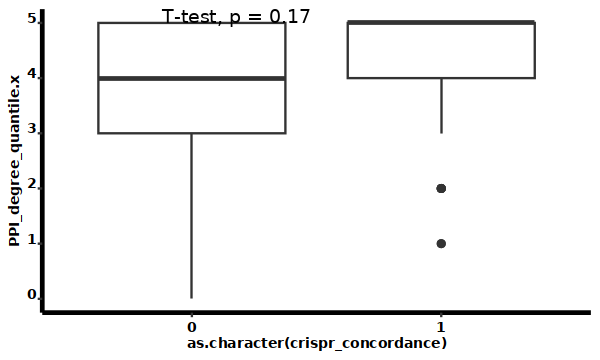

In [187]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(coeGene_test_data, aes(x=as.character(crispr_concordance), y=PPI_degree_quantile.x)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")


In [188]:
## Make comparison for eGenes with multiple entries

In [124]:
head(amount_entries_per_egene ,2)

eGene,n
<chr>,<int>
EIF5A,169
RPS26,129


In [125]:
coeGene_test_data_eGene = unique(test_data[test_data$eGene %in% amount_entries_per_egene$eGene[amount_entries_per_egene$n > 10],c('eGene', 'crispr_concordance', 'connect_decile.x', 'connect_quantile.x', 'coeGene', 'PPI_degree_quantile.x')])

In [126]:
nrow(coeGene_test_data_eGene)

[1] 781

In [115]:
## Boxplot

In [129]:
length(unique(coeGene_test_data$eGene))

[1] 11

Warning message:
"Removed 35 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 35 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


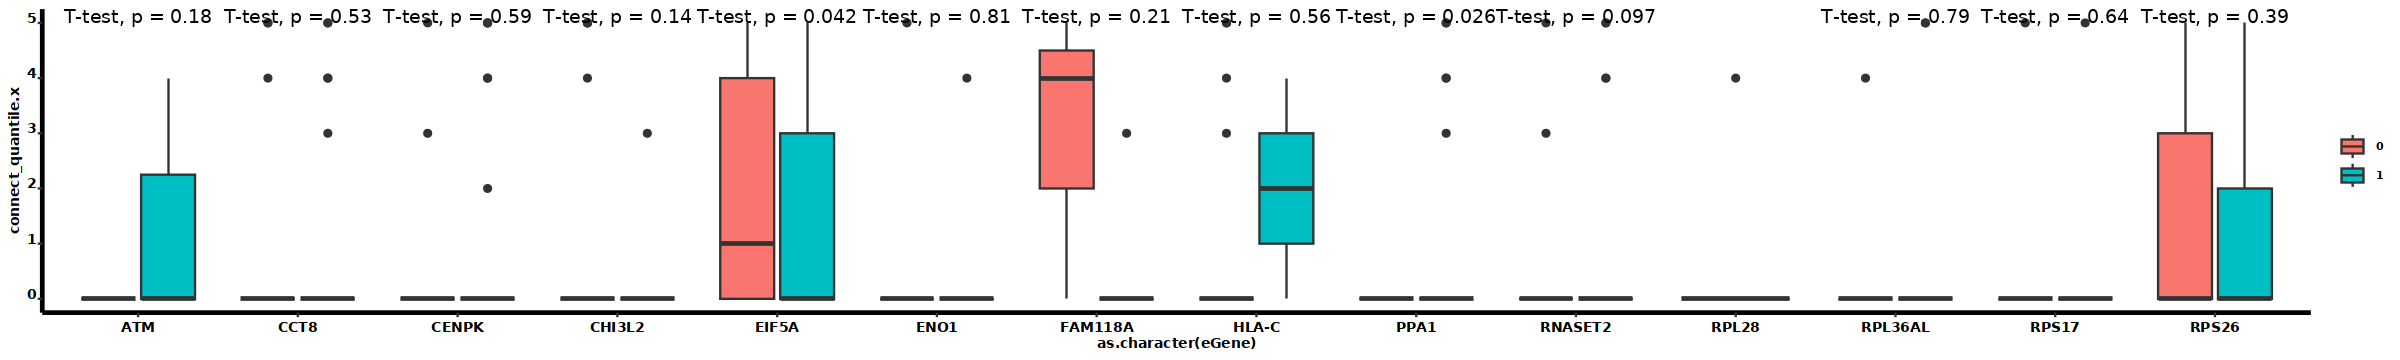

In [130]:
options(repr.plot.width = 20, repr.plot.height = 3)
ggplot(coeGene_test_data_eGene, aes(x=as.character(eGene), y=connect_quantile.x, fill = as.character(crispr_concordance))) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

Warning message:
"Removed 35 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 35 rows containing non-finite outside the scale range
(`stat_compare_means()`)."
Warning message:
"Computation failed in `stat_compare_means()`.
Caused by error in `mutate()`:
ℹ In argument: `p = purrr::map(...)`.
Caused by error in `purrr::map()`:
ℹ In index: 1.
ℹ With name: x.1.
Caused by error in `t.test.default()`:
! data are essentially constant"


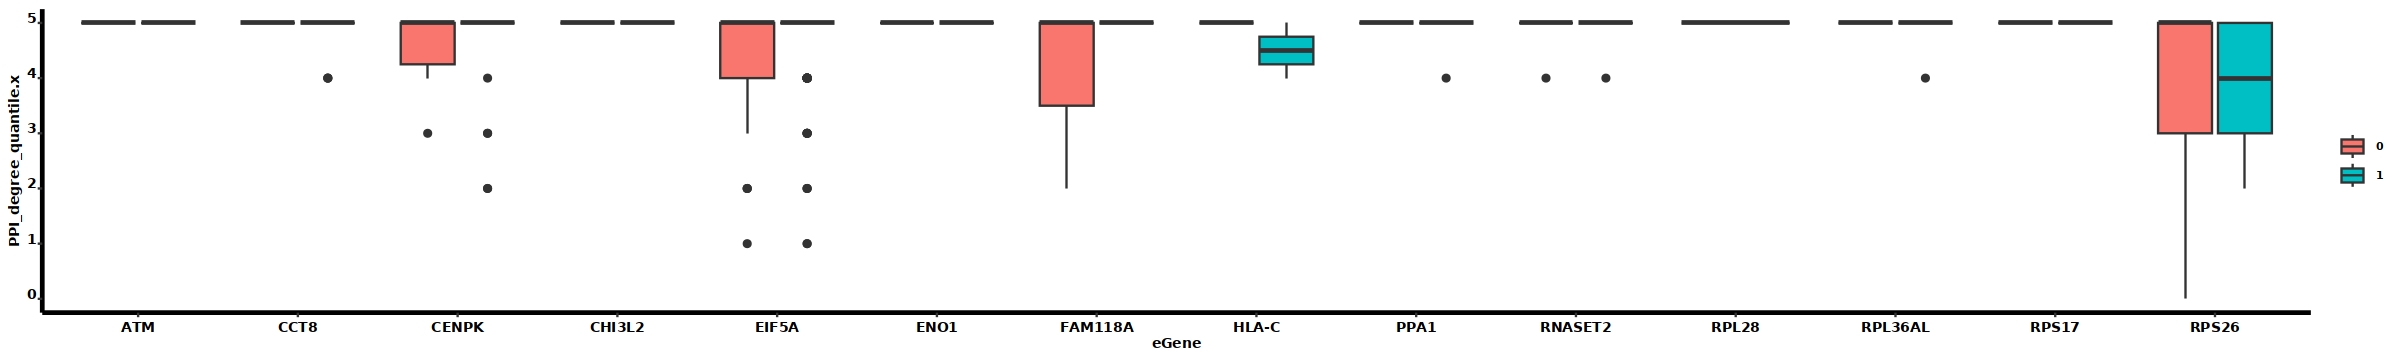

In [133]:
options(repr.plot.width = 20, repr.plot.height = 3)
ggplot(coeGene_test_data_eGene, aes(fill=as.character(crispr_concordance), y=PPI_degree_quantile.x, x = eGene)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")


In [189]:
### Logistic regression model

In [190]:
### Estimate the model (V2: use residualy after correcting for expression)

In [191]:
head(coeGene_test_data,2)

crispr_concordance,connect_decile.x,connect_quantile.x,coeGene,PPI_degree_quantile.x,weighted_mean_expression
<int>,<int>,<int>,<chr>,<int>,<dbl>
1,8,4,CERS6,2,0.3034894
1,0,0,COTL1,3,1.8859103


In [192]:
model_form = 'residuals ~ connect_quantile.x + PPI_degree_quantile.x'

In [193]:
test  = coeGene_test_data
test$crispr_concordance = as.numeric(test$crispr_concordance)

res = residuals(glm(crispr_concordance~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Waiting for profiling to be done...



In [194]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.337520983,0.34164611,-0.9879257,0.3244588,-1.00713505,0.33209309,(Intercept)
connect_quantile.x,-0.008327691,0.04498223,-0.1851329,0.8533244,-0.09649125,0.07983587,connect_quantile.x
PPI_degree_quantile.x,0.088999002,0.07678793,1.1590234,0.2479167,-0.06150257,0.23950057,PPI_degree_quantile.x


In [195]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [196]:
coef = coef[coef$variable != '(Intercept)',]

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


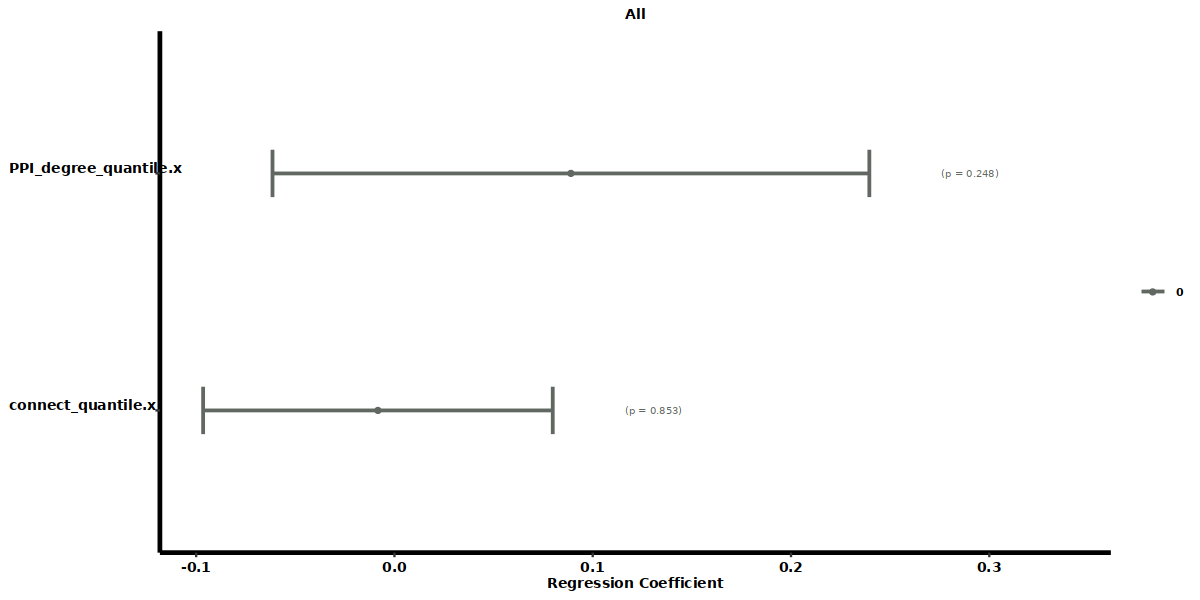

In [197]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#047cbb", "0"="#616761")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

# Analyze

## Define sign and non sign coegenes 

In [651]:
unique(coeqtls$cell_type)

[1] "Mono"

In [652]:
### Define list of significant eGenes per cell-type only on eGene level

In [653]:
### Any egene that is significant coeqtl in the cell-type or in any cell-type in the coeqtl data 
sign_coegenes = data.frame(coeGene = unique(coeqtls[coeqtls$type == 'unique',c('coeGene')]), sign = 1)
### All the eGenes (that passed the decision tree filter) that are not coeqtls as background
non_sign_coegenes = data.frame(coeGene = unique(gene_list$gene[(!gene_list$gene %in% coeqtls$coeGene) ]), sign = 0)


In [654]:
head(sign_coegenes,2)

,coeGene,sign
,<chr>,<dbl>
1,VIM,1
2,SPN,1


In [655]:
coegene_data = rbind(sign_coegenes, non_sign_coegenes)

In [656]:
head(coegene_data,2)

,coeGene,sign
,<chr>,<dbl>
1,VIM,1
2,SPN,1


In [657]:
### Overview coeGenes with coeqtl effect vs. coeGenes without coeqtl effect

In [658]:
coegene_data %>% group_by(sign) %>% summarise(n = length(unique(coeGene)))

sign,n
<dbl>,<int>
0,9571
1,641


In [659]:
length(unique(gene_list$gene))

[1] 10212

## Add Paper Scores to the Data

In [660]:
## Merge the gene level paper scores to coegene level data

In [661]:
nrow(coegene_data)

[1] 10212

In [662]:
coegene_data = merge(coegene_data, paper_scores, by.x = 'coeGene', by.y = 'gene')

In [663]:
coegene_data  = merge(coegene_data , paper_scores_go, by.x = 'hgnc_id', by.y = 'gene', all.x = TRUE)

In [664]:
nrow(coegene_data )  # some eGenes are not in score data

[1] 8579

In [665]:
head(coegene_data ,2)

,hgnc_id,coeGene,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile
,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,HGNC:10009,RHD,0,ENSG00000187010,8,58.052,1.482,2.8534e-05,0.951,3,⋯,0,1,1,1,0,0,0.0004460166,13,0,1
2,HGNC:1001,BCL6,0,ENSG00000113916,5,24.348,2.121,9.6038e-01,0.330,130,⋯,1,8,4,1,1,1,0.3147983882,232,8,10


## Add mean expression to the Data

In [666]:
nrow(coegene_data)

[1] 8579

In [667]:
coegene_data = merge(coegene_data, summary_stats_info_meta, by.x = 'coeGene', by.y = 'gene')

In [668]:
nrow(coegene_data)

[1] 8558

In [669]:
nrow(coegene_data[is.na(coegene_data$weighted_mean_expression),])

[1] 0

In [670]:
head(coegene_data,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,cell_type,weighted_mean_expression
,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
1,A1BG,HGNC:5,0,ENSG00000121410,30,8.314,1.488,4.9917e-09,1.208,7,⋯,2,1,0,0,0.015633338,1,0,4,Mono,0.1926664
2,AAGAB,HGNC:25662,0,ENSG00000103591,4,54.528,0.948,3.8664e-07,1.037,127,⋯,2,1,0,0,0.001060179,14,0,2,Mono,0.1814962


## EXK: compare co-eGenes vs. co-eGenes in CRISPR data

In [171]:
coegene_data$is_crispr = 0

In [222]:
coegene_data$is_crispr[coegene_data$coeGene %in% crispr_data$coeGene] = 1

In [223]:
unique(coegene_data$is_crispr)

[1] 0 1

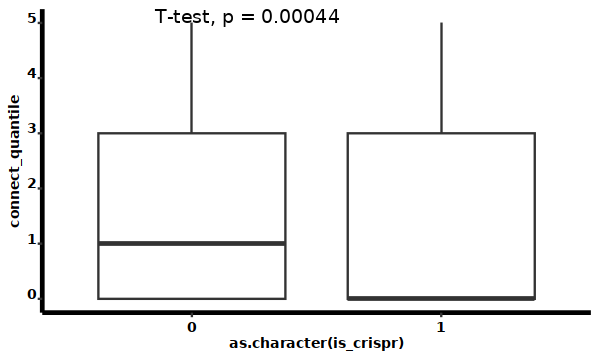

In [224]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(coegene_data, aes(x=as.character(is_crispr), y=connect_quantile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

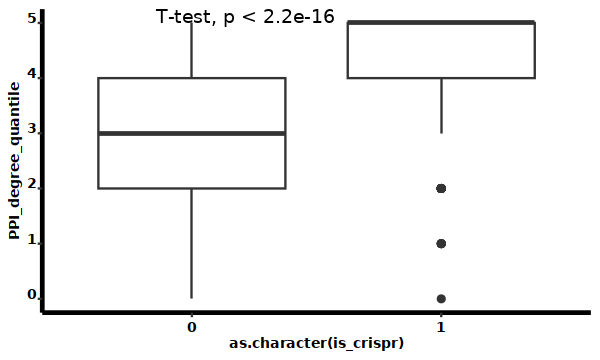

In [226]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(coegene_data, aes(x=as.character(is_crispr), y=PPI_degree_quantile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

# Compare Paper Score: with coeqtl effect vs. without coeqtl effect

## Logistic regression models with multiple features

In [671]:
### Scale features to use in model

In [672]:
result_data = data.frame()

In [673]:
coegene_data$sign = as.character(coegene_data$sign)

In [674]:
sort(colnames(coegene_data))

[1] "ABC_count"                  "ABC_length_per_type"       
 [3] "CDS_length"                 "cell_type"                 
 [5] "coeGene"                    "connect_decile"            
 [7] "connect_quantile"           "connectedness"             
 [9] "GeneSymbol"                 "GO_BP_count"               
[11] "GO_BP_count_400_auc"        "GO_BP_count_400_auc_decile"
[13] "hgnc_id"                    "HI"                        
[15] "hs"                         "length"                    
[17] "LOEUF"                      "pLI"                       
[19] "PPI_degree_cat"             "PPI_degree_decile"         
[21] "PPI_degree_quantile"        "promoter_count"            
[23] "Roadmap_count"              "Roadmap_length_per_type"   
[25] "sign"                       "TF"                        
[27] "TSSD"                       "weighted_mean_expression"

In [675]:
# Define the columns to scale as a character vector
cols_to_scale <- c("weighted_mean_expression" ,'CDS_length',  'connect_quantile','GO_BP_count_400_auc', 'hs', 'length', 'LOEUF', 'pLI',  'PPI_degree_quantile', 'promoter_count', 'Roadmap_count',
                  'Roadmap_length_per_type','TSSD' )

# Apply scaling to the selected columns only
coegene_data_scaled = coegene_data
coegene_data_scaled[cols_to_scale] <-lapply(coegene_data_scaled[cols_to_scale], function(x) as.numeric(scale(x)))
                                            
#coegene_data_scaled[cols_to_scale]  = lapply(coegene_data_scaled[cols_to_scale], function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))

In [676]:
summary(coegene_data_scaled$weighted_mean_expression)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.23808 -0.20389 -0.16429  0.00000 -0.07216 34.67889 

In [677]:
coegene_data_scaled %>% group_by(sign) %>% summarise(min_expr = min(weighted_mean_expression), max_expr = max(weighted_mean_expression))

sign,min_expr,max_expr
<chr>,<dbl>,<dbl>
0,-0.2380834,3.083055
1,-0.2106958,34.678892


### Residual Model for connectedness

In [678]:
### Estimate the model (V2: use residualy after correcting for expression)

In [679]:
model_form = 'residuals ~ connect_quantile + PPI_degree_quantile'

In [680]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...



In [681]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.165006452,0.006135873,-26.8920907,5.462924e-153,-0.17703254,-0.152980362,(Intercept)
connect_quantile,0.043195743,0.006140008,7.0351277,2.144049e-12,0.03116155,0.055229938,connect_quantile
PPI_degree_quantile,-0.005633271,0.006140008,-0.9174696,3.589225e-01,-0.01766747,0.006400924,PPI_degree_quantile


In [682]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [683]:
coef = coef[coef$variable != '(Intercept)',]

In [684]:
###  adjust label
coef$variable_label = coef$variable
coef$variable_label = str_replace(coef$variable_label, 'connect_quantile', 'Connectedness in co-expression networks')
coef$variable_label = str_replace(coef$variable_label, 'PPI_degree_quantile', 'Connectedness in InWeb PPI networks')

In [685]:
cell_type

[1] "Mono"

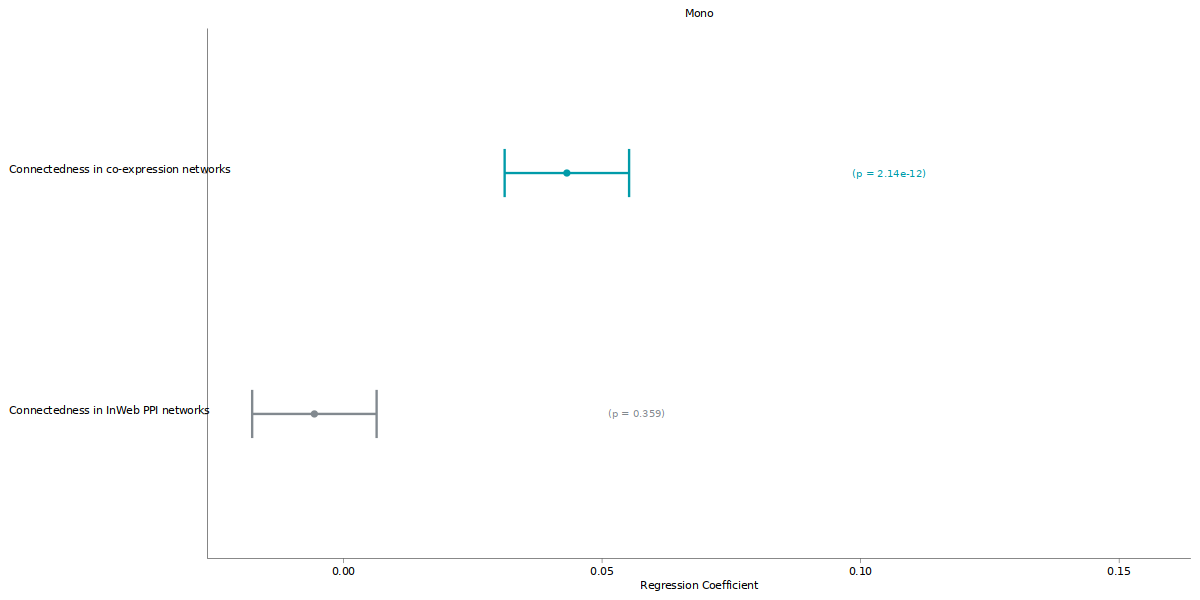

In [686]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =reorder(variable_label, Estimate), y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.5) + scale_color_manual(values = c("1" = "#009ba9", "0"="#82898f")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank(), legend.position = 'None') + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2) 
model_plot

In [687]:
pdf(paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

In [688]:
### Save data for plot

In [689]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable,sign,variable_label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
connect_quantile,0.043195743,0.006140008,7.0351277,2.144049e-12,0.03116155,0.055229938,connect_quantile,1,Connectedness in co-expression networks
PPI_degree_quantile,-0.005633271,0.006140008,-0.9174696,3.589225e-01,-0.01766747,0.006400924,PPI_degree_quantile,0,Connectedness in InWeb PPI networks


In [690]:
write.csv(coef, paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, '_data.csv'))

In [691]:
head(test,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,cell_type,weighted_mean_expression,residuals
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,A1BG,HGNC:5,0,ENSG00000121410,1.2938928,-0.5910643,-0.2171354,-0.7664656,0.9183775,7,⋯,1,0,0,-0.5889798,1,-0.7933876,4,Mono,-0.1448984,-0.2689503
2,AAGAB,HGNC:25662,0,ENSG00000103591,-0.9001773,-0.1846712,-0.5374335,-0.7664647,0.5570696,127,⋯,1,0,0,-0.7339131,14,-0.7933876,2,Mono,-0.1505425,-0.2665493


### Residual Model for LOEUF

In [692]:
### Estimate the model (V2: use residualy after correcting for expression)

In [693]:
model_form = 'residuals ~ LOEUF'

In [694]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...



In [695]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.16482729,0.006187328,-26.63950,3.148103e-150,-0.1769542300,-0.15270035,(Intercept)
LOEUF,0.01140262,0.006187692,1.84279,6.539454e-02,-0.0007250366,0.02353027,LOEUF


In [696]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [697]:
coef = coef[coef$variable != '(Intercept)',]

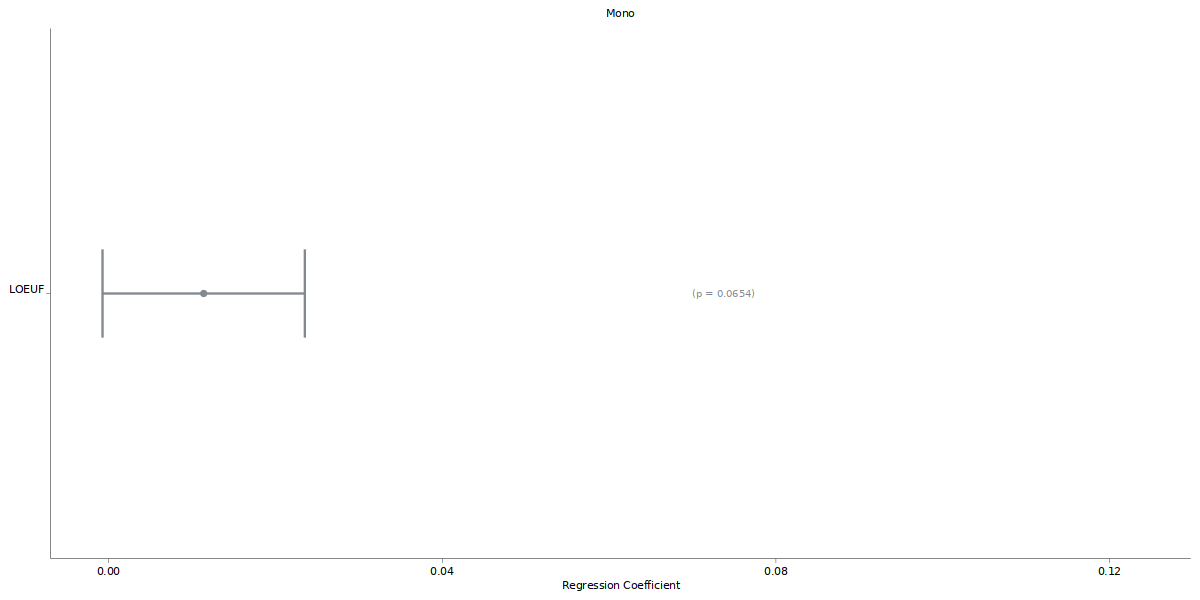

In [698]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.5) + scale_color_manual(values = c("1" = "#009ba9", "0"="#82898f")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank(), legend.position = 'None') + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [699]:
pdf(paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

In [700]:
### Save LOEUF data

In [701]:
write.csv(coef, paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, '_data.csv'))

In [702]:
### Make boxplot based on residuals (regress out expression out of LOEUFscore)

In [703]:
head(test,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,cell_type,weighted_mean_expression,residuals
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,A1BG,HGNC:5,0,ENSG00000121410,1.2938928,-0.5910643,-0.2171354,-0.7664656,0.9183775,7,⋯,1,0,0,-0.5889798,1,-0.7933876,4,Mono,-0.1448984,-0.2689503
2,AAGAB,HGNC:25662,0,ENSG00000103591,-0.9001773,-0.1846712,-0.5374335,-0.7664647,0.5570696,127,⋯,1,0,0,-0.7339131,14,-0.7933876,2,Mono,-0.1505425,-0.2665493


In [704]:
nrow(test[is.na(test$LOEUF),])

[1] 71

In [705]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)
test = test[!is.na(test$LOEUF),]

res = residuals(glm(LOEUF ~ weighted_mean_expression, data = test, family = 'gaussian'))   # select the beta of the random snp instead

## Add residuals to data
        
test$residuals = res

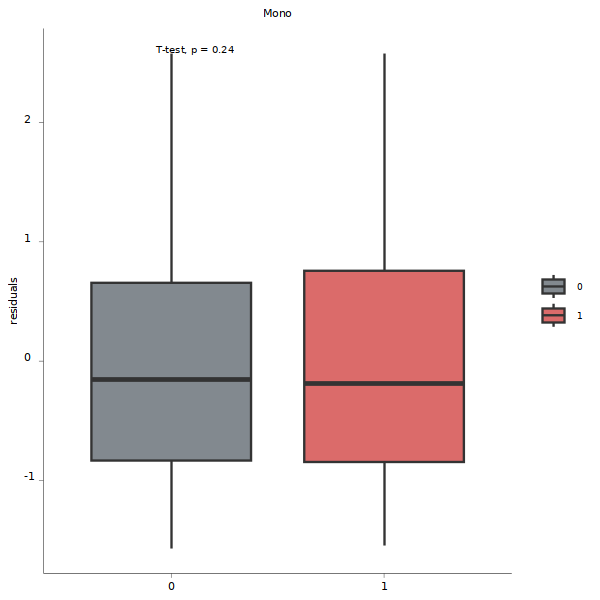

In [706]:
options(repr.plot.width = 5, repr.plot.height = 5)
loeuf_plot = ggplot(test, aes(x=as.character(sign), y=residuals, fill = as.character(sign))) +  coeqtl_fill + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test", size = 2) + ggtitle(cell_type) + theme(axis.title.x = element_blank())
loeuf_plot

In [707]:
pdf(paste0('figures/I2/I2_LOEUF_Score_residuals', cell_type, '.pdf'), width =2, height = 1.8)
loeuf_plot
dev.off()

pdf 
  2

### Residual Model for GO

In [708]:
### Estimate the model (V2: use residualy after correcting for expression)

In [709]:
model_form = 'residuals ~ GO_BP_count_400_auc'

In [710]:
test  = coegene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...



In [711]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.16500645,0.006151531,-26.823640,2.979120e-152,-0.177063231,-0.1529497,(Intercept)
GO_BP_count_400_auc,0.01401972,0.006151890,2.278928,2.269586e-02,0.001962233,0.0260772,GO_BP_count_400_auc


In [712]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [713]:
coef = coef[coef$variable != '(Intercept)',]

In [714]:
###  adjust label
coef$variable_label = coef$variable
coef$variable_label = str_replace(coef$variable_label, 'GO_BP_count_400_auc', 'Count of BP broadly unrelated GO terms')

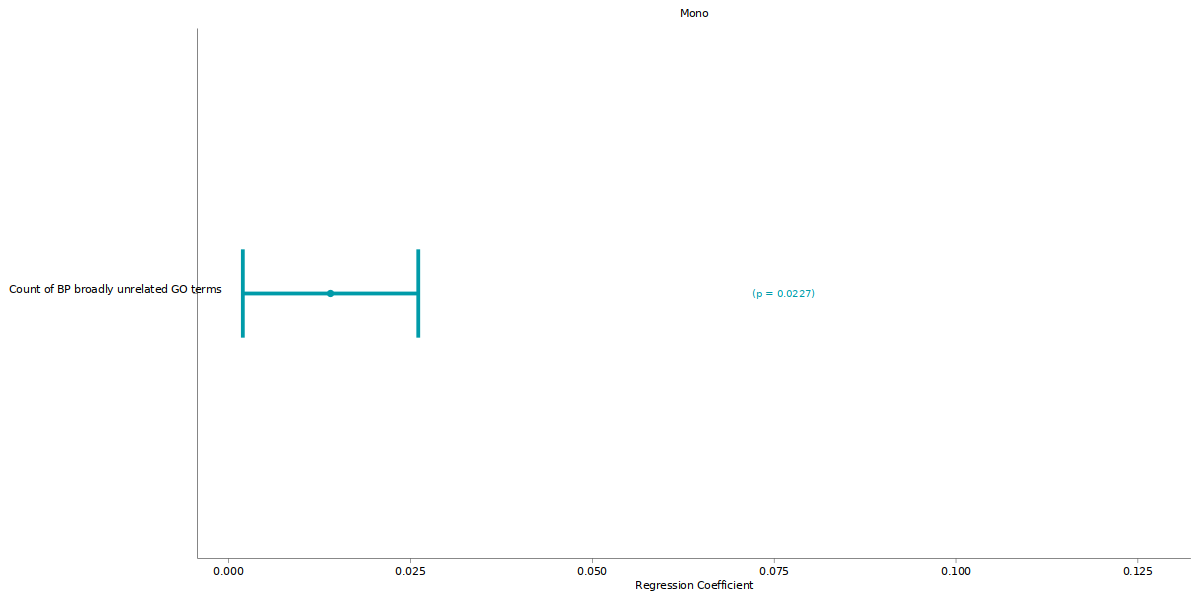

In [715]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =reorder(variable_label, Estimate), y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#009ba9", "0"="#82898f")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank(), legend.position = 'None') + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [716]:
pdf(paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

In [717]:
#### Save data of model
write.csv(coef, paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, '_data.csv'))

### General models (incl. multiple covariates; DEPR)

In [3810]:
### Investigate correlation of features

In [3811]:
#library(GGally, lib = "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library")

In [3812]:
#options(repr.plot.width = 20,repr.plot.height =20)
#ggpairs(coegene_data[cols_to_scale])

In [3815]:
head(coegene_data_scaled,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,cell_type,weighted_mean_expression
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>
1,A1BG,HGNC:5,0,ENSG00000121410,1.270950,-0.5467544,-0.1877266,-0.7607085,0.9255265,7,⋯,-0.9106676,1,0,0,-0.5823728,1,-0.7839905,4,B,-0.1414048
2,AAAS,HGNC:13666,0,ENSG00000094914,1.187306,-0.4739597,-0.1138449,-0.7607085,0.4582709,129,⋯,1.1989087,1,0,0,-0.7344348,48,-0.2839813,5,B,-0.1842051


In [3816]:
coegene_data_scaled$sign = as.numeric(coegene_data_scaled$sign)

In [3817]:
summary(coegene_data_scaled$hs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-0.7375 -0.7041 -0.4622  0.0000  0.3300  4.7039     211 

In [3818]:
#hist(coegene_data_scaled$hs)

In [3819]:
#head(coegene_data,2)

In [3820]:
### Estimate the model (V1: including all covariates)

In [3821]:
#model_form = 'sign ~ weighted_mean_expression + CDS_length + connect_quantile + GO_BP_count_400_auc + hs + length+ LOEUF + pLI + PPI_degree_quantile + promoter_count + Roadmap_count + Roadmap_length_per_type + TSSD'

model_form = 'sign ~  CDS_length + connect_quantile + GO_BP_count_400_auc + hs + length+ LOEUF + pLI + PPI_degree_quantile + promoter_count + Roadmap_count + Roadmap_length_per_type + TSSD'

model_form = 'sign ~ promoter_count + CDS_length + length + Roadmap_count + Roadmap_length_per_type + TSSD'

#model_form = 'sign ~ PPI_degree_quantile  + connect_quantile'

#model_form = 'sign ~ GO_BP_count_400_auc'
#model_form = 'sign ~ CDS_length +length + Roadmap_count + Roadmap_length_per_type + TSSD'  # comparable to mostafavi repl
#model_form = 'sign ~ LOEUF + pLI + hs'  # comparable to mostafavi repl

#model_form = 'sign ~ weighted_mean_expression + CDS_length + connect_quantile+ GO_BP_count_400_auc  + hs'

In [3822]:
#print(summary(result_model))

In [3823]:
test  = coegene_data_scaled 
result_model = glm(as.formula(model_form), data = test, family = 'binomial')

print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = as.formula(model_form), family = "binomial", data = test)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7976  -0.3789  -0.3150  -0.2472   4.5508  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -3.02348    0.05931 -50.981  < 2e-16 ***
promoter_count           0.27380    0.04165   6.574 4.88e-11 ***
CDS_length              -0.98719    0.11650  -8.474  < 2e-16 ***
length                   0.14015    0.03982   3.519 0.000433 ***
Roadmap_count           -0.30750    0.05096  -6.034 1.60e-09 ***
Roadmap_length_per_type  0.27514    0.04004   6.871 6.37e-12 ***
TSSD                     0.11315    0.04731   2.392 0.016764 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3669.3  on 8218  degrees of freedom
Residual deviance: 3452.9  on 8212  degrees of freedom
AIC: 3466.9

Number of Fisher Scorin

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

In [3824]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-3.0234752,0.05930632,-50.980654,0.000000e+00,-3.14261452,-2.9099241,(Intercept)
promoter_count,0.2737959,0.04164570,6.574408,4.884711e-11,0.19102700,0.3545037,promoter_count
CDS_length,-0.9871941,0.11650085,-8.473707,2.377047e-17,-1.22258801,-0.7659516,CDS_length
length,0.1401473,0.03982392,3.519174,4.328923e-04,0.06044374,0.2174439,length
Roadmap_count,-0.3074978,0.05096268,-6.033783,1.601647e-09,-0.40705458,-0.2071761,Roadmap_count
Roadmap_length_per_type,0.2751366,0.04004284,6.871056,6.372842e-12,0.19499768,0.3525933,Roadmap_length_per_type
TSSD,0.1131522,0.04730773,2.391834,1.676444e-02,0.01914693,0.2047035,TSSD


In [3825]:
coef$sign = 0
coef$sign[coef$`Pr(>|z|)` < 0.05] = 1

In [3826]:
coef = coef[coef$variable != '(Intercept)',]

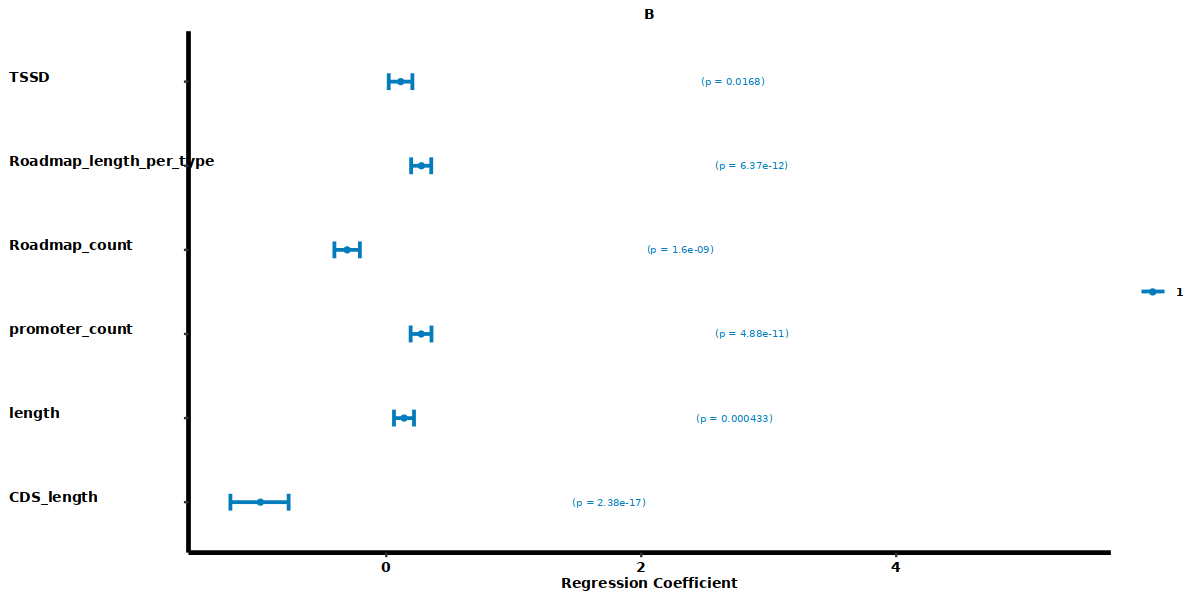

In [3827]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#047cbb", "0"="#616761")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 5) +  geom_text(aes(y = `97.5 %` +2.5, label =paste0( ' (p = ',  signif(`Pr(>|z|)`, digits = 3), ')')  ), size = 2)
model_plot

In [3828]:
pdf(paste0('figures/I2/I2_Model_', model_form , cell_type, '.pdf'), width =5, height = 3)
model_plot
dev.off()

pdf 
  2

In [3829]:
### Estimate the model (V2: use residualy after correcting for expression)

In [3830]:
#print(summary(result_model))

In [3831]:
#model_form = 'residuals ~ CDS_length + connect_quantile + GO_BP_count_400_auc + hs + length+ LOEUF + pLI + PPI_degree_quantile + promoter_count + Roadmap_count + Roadmap_length_per_type + TSSD'

In [3832]:
model_form = 'residuals ~ CDS_length + connect_quantile + GO_BP_count_400_auc + hs + length + pLI + PPI_degree_quantile + promoter_count + Roadmap_count + Roadmap_length_per_type + TSSD'

In [3833]:
model_form = 'residuals ~ promoter_count + CDS_length + length + Roadmap_count + Roadmap_length_per_type + TSSD'

In [3844]:
model_form = 'residuals ~ connect_quantile + PPI_degree_quantile'

In [3855]:
model_form = 'residuals ~  GO_BP_count_400_auc'

In [3866]:
model_form = 'residuals ~  pLI +  hs + LOEUF '

In [3726]:
model_form = 'residuals ~  pLI +  hs  '

In [3867]:
head(test,2)

,coeGene,hgnc_id,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,cell_type,weighted_mean_expression,residuals
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,A1BG,HGNC:5,0,ENSG00000121410,1.270950,-0.5467544,-0.1877266,-0.7607085,0.9255265,7,⋯,1,0,0,-0.5823728,1,-0.7839905,4,B,-0.1414048,-0.2276989
2,AAAS,HGNC:13666,0,ENSG00000094914,1.187306,-0.4739597,-0.1138449,-0.7607085,0.4582709,129,⋯,1,0,0,-0.7344348,48,-0.2839813,5,B,-0.1842051,-0.2033875


In [3868]:
#hist(test$residuals)

In [3869]:
length(res)

[1] 8219

In [3870]:
nrow(test)

[1] 8219

In [3871]:
test  = coegene_data_scaled 

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = as.formula(model_form), family = "gaussian", data = test)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.93721  -0.10914  -0.07416  -0.05051   2.91584  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.152516   0.005847 -26.084  < 2e-16 ***
pLI          0.024992   0.010171   2.457    0.014 *  
hs           0.003538   0.008629   0.410    0.682    
LOEUF        0.033865   0.008692   3.896 9.86e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.273657)

    Null deviance: 2194.6  on 8007  degrees of freedom
Residual deviance: 2190.4  on 8004  degrees of freedom
  (211 observations deleted due to missingness)
AIC: 12354

Number of Fisher Scoring iterations: 2



Waiting for profiling to be done...



In [3872]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.152515984,0.005847064,-26.084201,5.054812e-144,-0.163976018,-0.14105595,(Intercept)
pLI,0.024991913,0.010170727,2.457240,1.402199e-02,0.005057654,0.04492617,pLI
hs,0.003538485,0.008629021,0.410068,6.817671e-01,-0.013374086,0.02045106,hs
LOEUF,0.033864607,0.008692039,3.896049,9.857136e-05,0.016828524,0.05090069,LOEUF


In [3873]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [3874]:
coef = coef[coef$variable != '(Intercept)',]

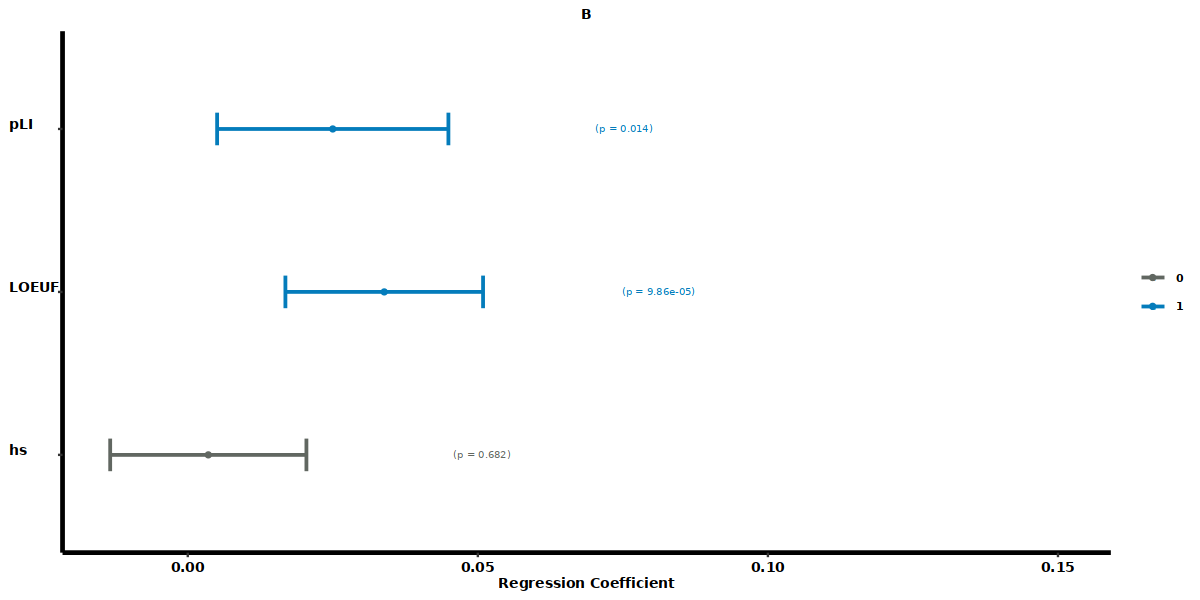

In [3875]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#047cbb", "0"="#616761")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.03
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [3876]:
pdf(paste0('figures/I2/I2_Residual_Model_', model_form , cell_type, '.pdf'), width =5, height = 3)
model_plot
dev.off()

pdf 
  2

## Logistic regression models against random genes (DEPR)

In [2470]:
### Scale features to use in model

In [2471]:
result_data = data.frame()

In [2472]:
coegene_data$sign = as.numeric(coegene_data$sign)

In [2473]:
sort(colnames(coegene_data))

[1] "ABC_count"                  "ABC_length_per_type"       
 [3] "CDS_length"                 "cell_type"                 
 [5] "coeGene"                    "connect_decile"            
 [7] "connect_quantile"           "connectedness"             
 [9] "GeneSymbol"                 "GO_BP_count"               
[11] "GO_BP_count_400_auc"        "GO_BP_count_400_auc_decile"
[13] "hgnc_id"                    "HI"                        
[15] "hs"                         "length"                    
[17] "LOEUF"                      "pLI"                       
[19] "PPI_degree_cat"             "PPI_degree_decile"         
[21] "PPI_degree_quantile"        "promoter_count"            
[23] "Roadmap_count"              "Roadmap_length_per_type"   
[25] "sign"                       "TF"                        
[27] "TSSD"                       "weighted_mean_expression"

In [2474]:
### Get random genes

In [2475]:
paper_scores_all = merge(paper_scores, paper_scores_go, by.x = 'hgnc_id', by.y = 'gene')

In [2476]:
nrow(paper_scores_all)

[1] 18332

In [2477]:
### remove tested genes

In [2478]:
paper_scores_all_subset = paper_scores_all[! paper_scores_all$gene %in% coegene_data$coeGene,]

In [2479]:
nrow(paper_scores_all_subset)

[1] 9774

In [2480]:
### Select x random entries

In [2481]:
set.seed(1)
random_rows <- paper_scores_all_subset %>% dplyr::slice_sample(n = 2000)

In [2482]:
nrow(random_rows)

[1] 2000

In [2483]:
random_rows$sign = 0

In [2484]:
random_rows = data.frame(random_rows)

In [2485]:
### Model 1: random against - significant coeGenes

In [2486]:
prediction_data = rbind(random_rows[,colnames(random_rows) %in% colnames(coegene_data)],
                        coegene_data[coegene_data$sign == 1, colnames(coegene_data) %in% colnames(random_rows)])                 

In [2487]:
# Define the columns to scale as a character vector
cols_to_scale <- c( 'CDS_length',  'connect_quantile','GO_BP_count_400_auc', 'hs', 'length', 'LOEUF', 'pLI',  'PPI_degree_quantile', 'promoter_count', 'Roadmap_count',
                  'Roadmap_length_per_type','TSSD' )

# Apply scaling to the selected columns only
prediction_data[cols_to_scale] <-lapply(prediction_data[cols_to_scale], function(x) as.numeric(scale(x)))

In [2488]:
#random_rows[,colnames(random_rows) %in% colnames(coegene_data_scaled)]

In [2489]:
#head(random_rows)

In [2490]:
nrow(prediction_data)

[1] 2584

In [2491]:
prediction_data %>% group_by(sign) %>% dplyr::count()

sign,n
<dbl>,<int>
0,2000
1,584


In [2492]:
head(prediction_data,2)

,hgnc_id,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,ABC_length_per_type,Roadmap_count,⋯,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,sign
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,HGNC:13752,ENSG00000177791,0.1785483,-0.3776375,-0.2941006,-0.5797361,0.4109914,59,1.8704407,0.5780849,⋯,5,0.2772971,1,0,0,-0.6220909,123,1.2563254,10,0
2,HGNC:4791,ENSG00000275126,1.0095714,-0.4403905,-0.5165366,-0.5788035,1.8658206,85,0.9353412,0.6314310,⋯,0,-1.5230438,0,0,0,0.1885303,64,-0.7398897,4,0


In [2493]:
model_form = 'sign ~  CDS_length + connect_quantile + GO_BP_count_400_auc + hs + length+ LOEUF + pLI + PPI_degree_quantile + promoter_count + Roadmap_count + Roadmap_length_per_type + TSSD'

In [2494]:
#print(summary(result_model))

In [2495]:
test  = prediction_data
result_model = glm(as.formula(model_form), data = test, family = 'binomial')

print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)




Call:
glm(formula = as.formula(model_form), family = "binomial", data = test)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7101  -0.7167  -0.4433  -0.1871   2.8912  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.5341360  0.0653967 -23.459  < 2e-16 ***
CDS_length              -0.6581482  0.1280813  -5.139 2.77e-07 ***
connect_quantile         0.2725250  0.0552074   4.936 7.96e-07 ***
GO_BP_count_400_auc      0.0004834  0.0512363   0.009 0.992472    
hs                      -0.0385394  0.0726845  -0.530 0.595954    
length                   0.0519031  0.0613431   0.846 0.397490    
LOEUF                   -0.2037947  0.0919303  -2.217 0.026634 *  
pLI                      0.2412725  0.0832972   2.897 0.003773 ** 
PPI_degree_quantile      0.8092116  0.0689236  11.741  < 2e-16 ***
promoter_count           0.2928642  0.0611702   4.788 1.69e-06 ***
Roadmap_count           -0.2344004  0.0705785  -3.321 0

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [2496]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-1.5341360206,0.06539671,-23.458919142,1.071974e-121,-1.66486762,-1.40836066,(Intercept)
CDS_length,-0.6581481563,0.12808126,-5.138520476,2.769100e-07,-0.91786263,-0.41570103,CDS_length
connect_quantile,0.2725250421,0.05520742,4.936384468,7.958415e-07,0.16442018,0.38092834,connect_quantile
GO_BP_count_400_auc,0.0004834354,0.05123634,0.009435401,9.924718e-01,-0.10009898,0.10108122,GO_BP_count_400_auc
hs,-0.0385393907,0.07268451,-0.530228402,5.959536e-01,-0.18188158,0.10330516,hs
length,0.0519031357,0.06134311,0.846111884,3.974903e-01,-0.06825469,0.17268441,length
LOEUF,-0.2037946958,0.09193027,-2.216839956,2.663403e-02,-0.38511935,-0.02455542,LOEUF
pLI,0.2412724835,0.08329719,2.896526214,3.773191e-03,0.07815239,0.40485824,pLI
PPI_degree_quantile,0.8092116076,0.06892356,11.740710484,7.882148e-32,0.67554337,0.94585735,PPI_degree_quantile


In [2497]:
coef$type = 'coeGene'

In [2498]:
coef$sign = 0
coef$sign[coef$`Pr(>|z|)` < 0.05] = 1

In [2499]:
coef = coef[coef$variable != '(Intercept)',]

In [2500]:
coef_coegene = coef

In [2501]:
### Model 2: random against - non significant coeGenes

In [2502]:
added_coegene_data = coegene_data[coegene_data$sign == 0, colnames(coegene_data) %in% colnames(random_rows)] # non significant coeGenes but tested
added_coegene_data$sign = 1

In [2503]:
prediction_data = rbind(random_rows[,colnames(random_rows) %in% colnames(coegene_data)],
                        added_coegene_data)                 

In [2504]:
# Define the columns to scale as a character vector
cols_to_scale <- c( 'CDS_length',  'connect_quantile','GO_BP_count_400_auc', 'hs', 'length', 'LOEUF', 'pLI',  'PPI_degree_quantile', 'promoter_count', 'Roadmap_count',
                  'Roadmap_length_per_type','TSSD' )

# Apply scaling to the selected columns only
prediction_data[cols_to_scale] <-lapply(prediction_data[cols_to_scale], function(x) as.numeric(scale(x)))

In [2505]:
#random_rows[,colnames(random_rows) %in% colnames(coegene_data_scaled)]

In [2506]:
#head(random_rows)

In [2507]:
nrow(prediction_data)

[1] 9974

In [2508]:
prediction_data %>% group_by(sign) %>% dplyr::count()

sign,n
<dbl>,<int>
0,2000
1,7974


In [2509]:
head(prediction_data,2)

,hgnc_id,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,ABC_length_per_type,Roadmap_count,⋯,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile,sign
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,HGNC:13752,ENSG00000177791,0.3334198,-0.5256244,-0.4770446,-0.7057703,0.7848095,59,1.8704407,0.4626093,⋯,5,-0.02918784,1,0,0,-0.674464153,123,1.2082163,10,0
2,HGNC:4791,ENSG00000275126,1.2458643,-0.6052807,-0.7736596,-0.7049571,2.2995743,85,0.9353412,0.5212527,⋯,0,-2.00959255,0,0,0,-0.007416966,64,-0.7678023,4,0


In [2510]:
model_form = 'sign ~  CDS_length + connect_quantile + GO_BP_count_400_auc + hs + length+ LOEUF + pLI + PPI_degree_quantile + promoter_count + Roadmap_count + Roadmap_length_per_type + TSSD'

In [2511]:
#print(summary(result_model))

In [2512]:
test  = prediction_data
result_model = glm(as.formula(model_form), data = test, family = 'binomial')

print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)




Call:
glm(formula = as.formula(model_form), family = "binomial", data = test)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6499   0.3390   0.4812   0.6564   1.8836  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              1.64109    0.03038  54.023  < 2e-16 ***
CDS_length              -0.19133    0.03686  -5.191 2.09e-07 ***
connect_quantile         0.03714    0.02980   1.246   0.2127    
GO_BP_count_400_auc     -0.13834    0.03161  -4.376 1.21e-05 ***
hs                      -0.01450    0.04953  -0.293   0.7698    
length                  -0.03480    0.03109  -1.119   0.2630    
LOEUF                   -0.46435    0.04156 -11.173  < 2e-16 ***
pLI                      0.04826    0.05418   0.891   0.3731    
PPI_degree_quantile      0.54651    0.03184  17.163  < 2e-16 ***
promoter_count           0.08097    0.03551   2.281   0.0226 *  
Roadmap_count            0.12978    0.03283   3.953 7.71e-05 ***
Roadmap_leng

Waiting for profiling to be done...



In [2513]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),1.64108569,0.03037764,54.022818,0.000000e+00,1.58204429,1.70113947,(Intercept)
CDS_length,-0.19132680,0.03685639,-5.191144,2.090063e-07,-0.26277140,-0.11917940,CDS_length
connect_quantile,0.03713501,0.02979958,1.246159,2.127062e-01,-0.02112851,0.09570165,connect_quantile
GO_BP_count_400_auc,-0.13834037,0.03161353,-4.375986,1.208850e-05,-0.19942471,-0.07541743,GO_BP_count_400_auc
hs,-0.01449593,0.04953385,-0.292647,7.697920e-01,-0.11072599,0.08353017,hs
length,-0.03479886,0.03109227,-1.119213,2.630494e-01,-0.09422158,0.02796031,length
LOEUF,-0.46435102,0.04155987,-11.173063,5.524271e-29,-0.54586054,-0.38293602,LOEUF
pLI,0.04825595,0.05417549,0.890734,3.730719e-01,-0.05739243,0.15502335,pLI
PPI_degree_quantile,0.54651150,0.03184154,17.163477,4.983873e-66,0.48434121,0.60917360,PPI_degree_quantile


In [2514]:
coef$type = 'tested coeGene ns '

In [2515]:
coef$sign = 0
coef$sign[coef$`Pr(>|z|)` < 0.05] = 1

In [2516]:
coef = coef[coef$variable != '(Intercept)',]

In [2517]:
coef = rbind(coef_coegene, coef)

In [2518]:
coef$variable = paste0(coef$variable, ' ( ', coef$type, ')')

In [2519]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),2.5 %,97.5 %,variable,type,sign
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
CDS_length,-0.6581481563,0.12808126,-5.138520476,2.769100e-07,-0.91786263,-0.41570103,CDS_length ( coeGene),coeGene,1
connect_quantile,0.2725250421,0.05520742,4.936384468,7.958415e-07,0.16442018,0.38092834,connect_quantile ( coeGene),coeGene,1
GO_BP_count_400_auc,0.0004834354,0.05123634,0.009435401,9.924718e-01,-0.10009898,0.10108122,GO_BP_count_400_auc ( coeGene),coeGene,0
hs,-0.0385393907,0.07268451,-0.530228402,5.959536e-01,-0.18188158,0.10330516,hs ( coeGene),coeGene,0
length,0.0519031357,0.06134311,0.846111884,3.974903e-01,-0.06825469,0.17268441,length ( coeGene),coeGene,0
LOEUF,-0.2037946958,0.09193027,-2.216839956,2.663403e-02,-0.38511935,-0.02455542,LOEUF ( coeGene),coeGene,1
pLI,0.2412724835,0.08329719,2.896526214,3.773191e-03,0.07815239,0.40485824,pLI ( coeGene),coeGene,1
PPI_degree_quantile,0.8092116076,0.06892356,11.740710484,7.882148e-32,0.67554337,0.94585735,PPI_degree_quantile ( coeGene),coeGene,1
promoter_count,0.2928641526,0.06117022,4.787691757,1.687105e-06,0.17588369,0.41561182,promoter_count ( coeGene),coeGene,1


In [2520]:
### Plot comparing both against random genes

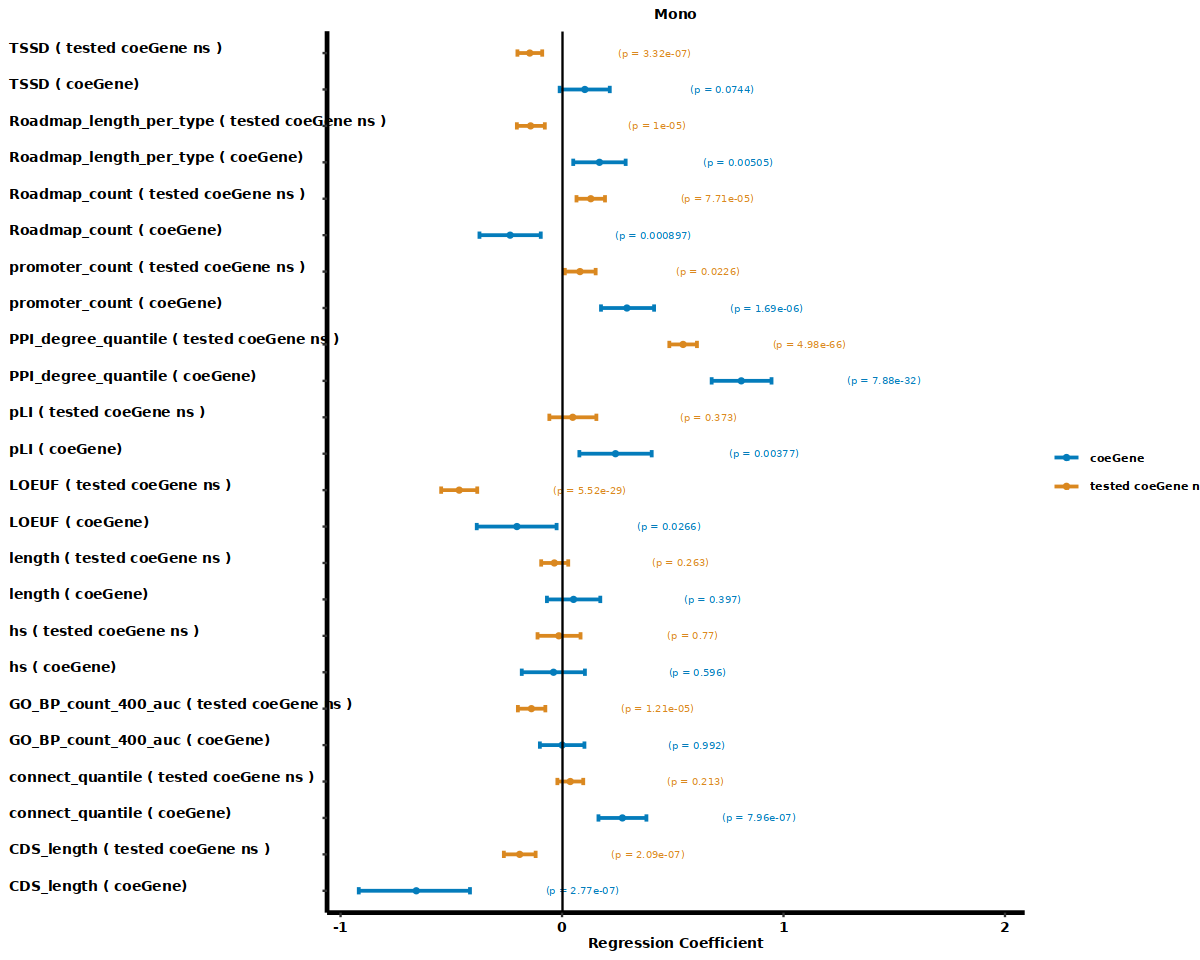

In [2521]:
options(repr.plot.width = 10,repr.plot.height =8)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(type))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("coeGene" = "#047cbb", "tested coeGene ns "="#da8820")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 1) +  geom_text(aes(y = `97.5 %` +0.5, label =paste0( ' (p = ',  signif(`Pr(>|z|)`, digits = 3), ')')  ), size = 2) + geom_hline(yintercept = 0)
model_plot

In [2522]:
pdf(paste0('figures/I2/I2_Model_Random', model_form , cell_type, '.pdf'), width =7, height = 4)
model_plot
dev.off()

pdf 
  2

## TSS Count (DEPR)

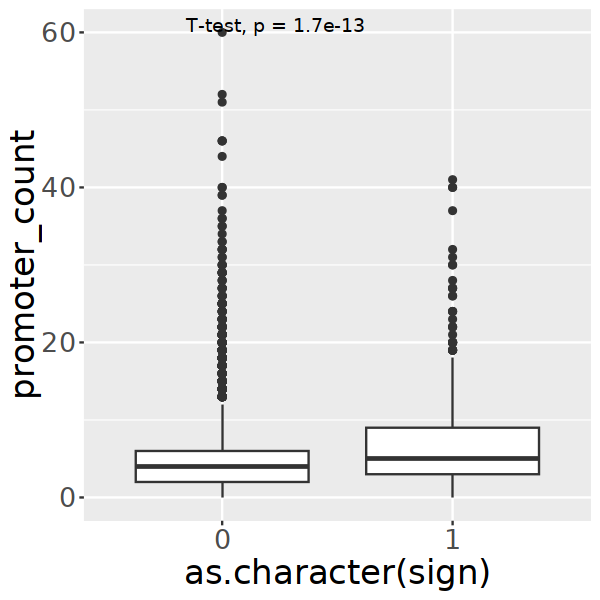

In [2523]:
# Check out the TSS count across biosamples, processed using data from the FANTOM project
options(repr.plot.width = 5,repr.plot.height =5)
ggplot(coegene_data, aes(x=as.character(sign), y=promoter_count)) + 
    geom_boxplot()  + stat_compare_means(method = "t.test") + theme(text = element_text(size = 20)) 

In [2524]:
coegene_data %>% group_by(sign) %>% summarise(mean_promoter_count = mean(promoter_count))

sign,mean_promoter_count
<dbl>,<dbl>
0,5.055932
1,7.054795


In [2525]:
t_test_p = t.test(coegene_data$promoter_count ~ coegene_data$sign)$p.value

In [2526]:
t_test_p

[1] 1.692702e-13

In [2527]:
t.test(coegene_data$promoter_count ~ coegene_data$sign)


	Welch Two Sample t-test

data:  coegene_data$promoter_count by coegene_data$sign
t = -7.5359, df = 630.42, p-value = 1.693e-13
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -2.519736 -1.477989
sample estimates:
mean in group 0 mean in group 1 
       5.055932        7.054795 


In [2528]:
# Check out the TSS count across biosamples, processed using data from the FANTOM project
options(repr.plot.width = 5, repr.plot.height = 3)
tss_plot <- ggplot(coegene_data, aes(x = as.character(sign), y = promoter_count, fill = as.character(sign))) + 
    geom_boxplot(outlier.shape = NA) +  # Removes outliers from the plot but keeps all data for calculations
    stat_compare_means(method = "t.test", vjust =-3, hjust = 1) + 
    xlab('is coeqtl') + 
    ggtitle(cell_type) +  plot_config + coeqtl_fill + coord_flip() + theme(axis.title.y = element_blank())# + ylim(quantile(egene_data$promoter_count, probs = c(0.01, 0.99)))

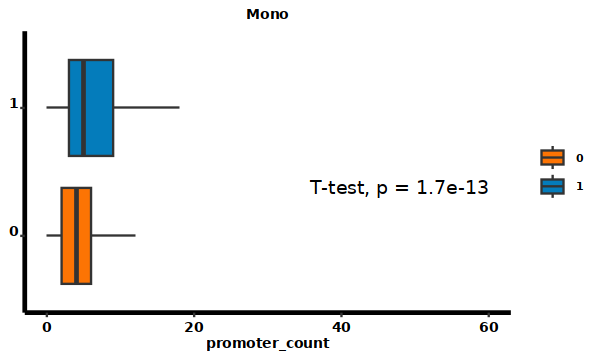

In [2529]:
tss_plot

In [2530]:
### Save the plot

In [2531]:
pdf(paste0('figures/I2/I2_TSS_Count_Fantom_Boxplot_', cell_type, '.pdf'), width =3, height = 3)
tss_plot
dev.off()

pdf 
  2

In [2532]:
promoter_summary = coegene_data %>% group_by(sign) %>% summarise(mean_promoter_count = mean(promoter_count), sd_promoter_count = sd(promoter_count),
                                                              median_promoter_count = median(promoter_count), quant_25 = quantile(promoter_count, probs = c(0.25)),
                                                              quant_75 =quantile(promoter_count, probs = c(0.75) ), amount_obs = n())

In [2533]:
promoter_summary

sign,mean_promoter_count,sd_promoter_count,median_promoter_count,quant_25,quant_75,amount_obs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,5.055932,4.641616,4,2,6,7974
1,7.054795,6.285687,5,3,9,584


In [2534]:
t_test_p

[1] 1.692702e-13

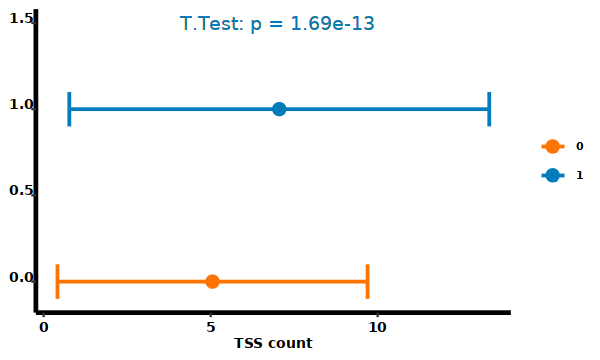

In [2535]:
# Create the plot
tss_plot_alt = ggplot(promoter_summary, aes(x = sign, y = mean_promoter_count, color = as.character(sign))) +
  geom_point(size = 3) +                                  # Plot points
  geom_errorbar(aes(ymin = mean_promoter_count - sd_promoter_count, 
                    ymax =mean_promoter_count + sd_promoter_count), 
                width = 0.2, size = 0.8) +  plot_config + coord_flip() + coeqtl_col + ylab('TSS count')  + theme(axis.title.y = element_blank()) + geom_text(aes(x = 1.5, y = 7, label = paste0('T.Test: p = ' ,  signif(t_test_p, digits = 3))))
tss_plot_alt

In [2536]:
pdf(paste0('figures/I2/I2_TSS_Count_Fantom_Mean_SD_Plot_', cell_type, '.pdf'), width =4, height = 1.5)
tss_plot_alt
dev.off()

pdf 
  2

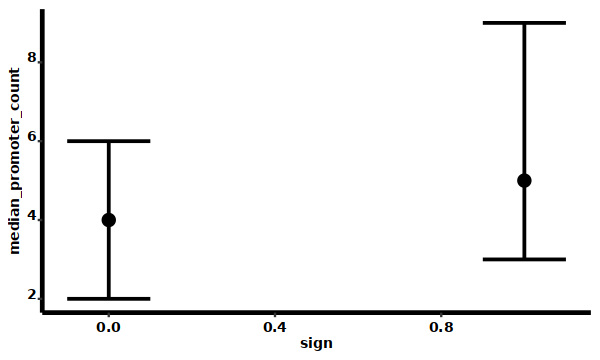

In [2537]:
# Create the plot
ggplot(promoter_summary, aes(x = sign, y = median_promoter_count)) +
  geom_point(size = 3) +                                  # Plot points
  geom_errorbar(aes(ymin = quant_25, 
                    ymax = quant_75), 
                width = 0.2, size = 0.8) +  plot_config 

## Roadmap Features (DEPR)

### Plots comparing the features

In [2538]:
## Enhancer length

In [2539]:
options(repr.plot.width = 5, repr.plot.height = 5)
enhancer_length_plot =  ggplot(unique(coegene_data[,c('coeGene', 'sign', 'Roadmap_length_per_type')]), aes(x=as.character(sign), y=Roadmap_length_per_type)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + ggtitle(cell_type) + xlab('is_coeqtl') #+ ylim(0,10)

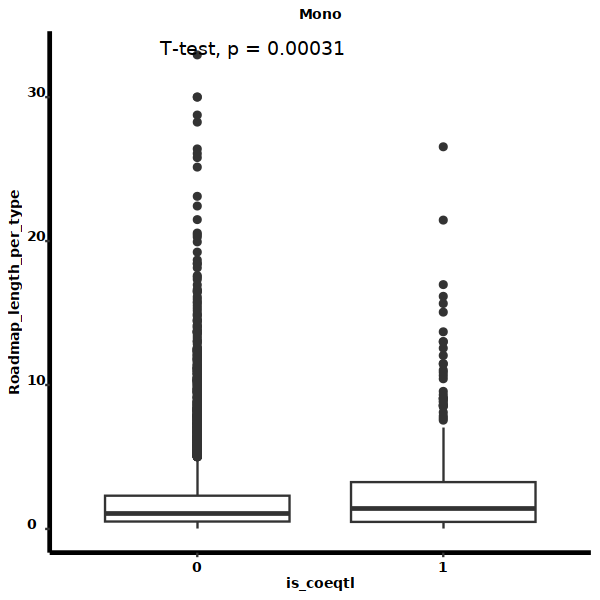

In [2540]:
enhancer_length_plot

In [2541]:
## Save the plot
pdf(paste0('figures/I2/I2_Roadmap_Enhancer_Length_', cell_type, '.pdf'), width =3, height = 3)
enhancer_length_plot
dev.off()

pdf 
  2

In [2542]:
options(repr.plot.width = 5, repr.plot.height = 5)
active_tissues_plot = ggplot(unique(coegene_data[,c('coeGene', 'sign', 'Roadmap_count')]), aes(x=as.character(sign), y=Roadmap_count)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + xlab('is_coeqtl') + ggtitle(cell_type)#+ ylim(0,10)

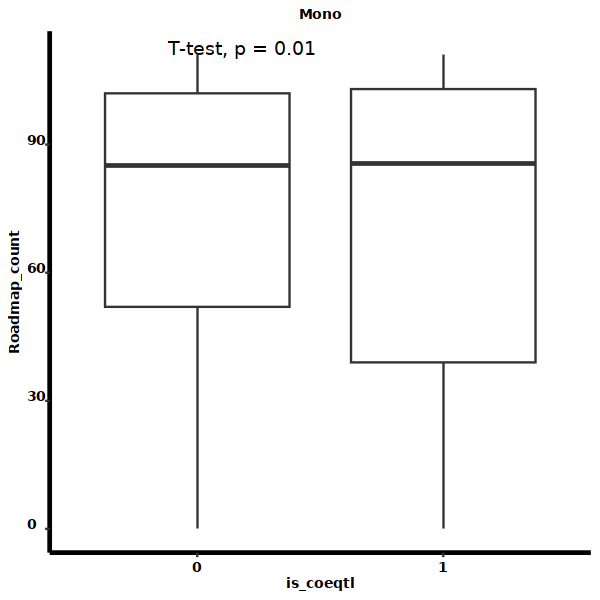

In [2543]:
active_tissues_plot

In [2544]:
## Save the plot
pdf(paste0('figures/I2/I2_Roadmap_Active_Tissues_', cell_type, '.pdf'), width =3, height = 3)
active_tissues_plot
dev.off()

pdf 
  2

In [2545]:
cell_type

[1] "Mono"

## Nasser data (DEPR)

###  Plots comparing features

In [2546]:
### Count of active tissues

In [2547]:
options(repr.plot.width = 5, repr.plot.height = 5)
nasser_active_tissues = ggplot(unique(coegene_data[,c('coeGene', 'sign', 'ABC_count')]), aes(x=as.character(sign), y=ABC_count)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + xlab('is_coeqtl') + ggtitle(cell_type)

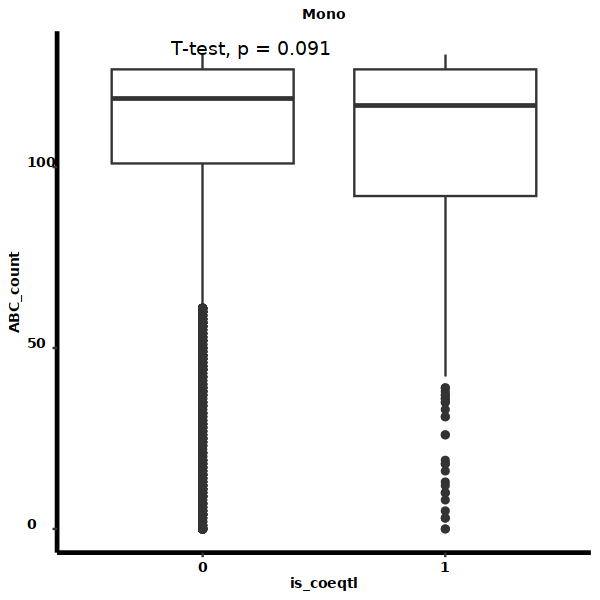

In [2548]:
nasser_active_tissues

In [2549]:
## Save the plot
pdf(paste0('figures/I2/I2_Nasser_Active_Tissues_', cell_type, '.pdf'), width =3, height = 3)
nasser_active_tissues
dev.off()

pdf 
  2

In [2550]:
### mean length of ABC enhancers across active biosamples, processed using data from Nasser et al., Nature 2021

In [2551]:
options(repr.plot.width = 5, repr.plot.height = 5)
nasser_enhancer_length = ggplot(unique(coegene_data[,c('coeGene', 'sign', 'ABC_length_per_type')]), aes(x=as.character(sign), y=ABC_length_per_type)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + xlab('is_coeqtl') + ggtitle(cell_type)

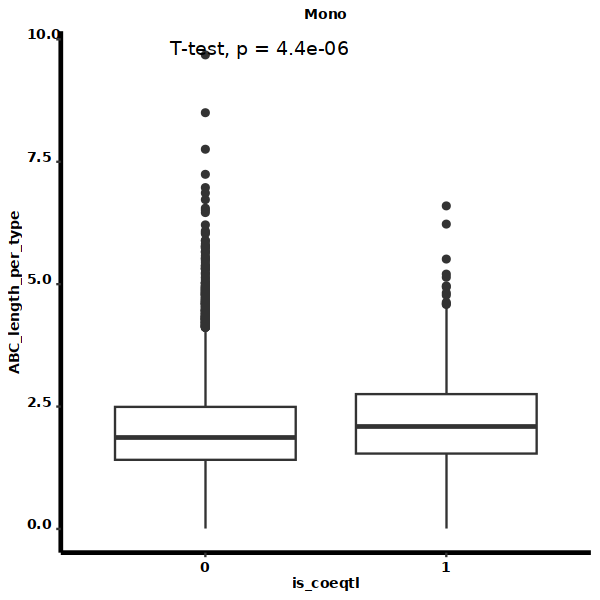

In [2552]:
nasser_enhancer_length

In [2553]:
## Save the plot
pdf(paste0('figures/I2/I2_Nasser_Enhancer_Length_', cell_type, '.pdf'), width =3, height = 3)
nasser_enhancer_length
dev.off()

pdf 
  2

## Go Counts

In [192]:
### Go count feature 

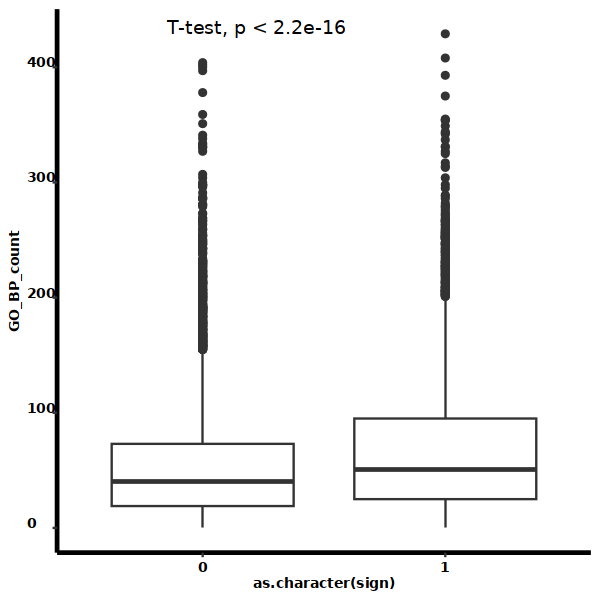

In [193]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=GO_BP_count)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")# + ylim(0,25)

In [194]:
unique(coegene_data$GO_BP_count)

[1]   1  90  48  62  14  54  40  27  80  39  25 105 123  30 144 126  12 182
 [19]  82  46 138  53  49  83  16  17  33  85  59   0  99  28  45  20  76   8
 [37]  19  44  47  43  74  71 116 100  88 402 130  24   5   6  35  89  26  70
 [55]  69  22  57  52  23  75  10  21 128  50  73  18  58  72 139 114  84  41
 [73]  42 148 115 104 165  11 186 131 214 154 150 159 185 121  91 193 254 184
 [91] 163 145  78  29  55  32  34 175 192  87 243  56 225 156 181   4  94 132
[109] 160 106 120  13  31 152   9 205 125  97 112 119  67 133 142 140  98  66
[127] 404 217 109  37  38 137  61 135 108  15  60  65  77  79  36 263 127  68
[145]  64  51 102 196 157  63   3 351 162 122 113 230  95 111 155 110 103  92
[163] 172  81 220 189 286 101 134 117 253 226 187 295 147  93 146  86 153 221
[181] 177 238 174 124 201 183 206 143 313 168 191 232 178   2 141 256 241 219
[199] 171  96 136 169 166   7 203 190 276 170 215 151 208 245 149 129 107 274
[217] 222 231 267 240 272 188 341 266 200 227 269 213 212 161 194 282 204 211
[235] 209 158 198 218 167 207 355 247 300 223 202 173 216 179 400 228 255 259
[253] 180 246 236 260 248 289 304 273 298 118 229 199 234 327 224 239 297 164
[271] 278 349 287 393 331 337 281 251 343 288 264 250 307 344 252 176 237 242
[289] 334 210 296 317 268 258 279 338 291 270 408 314 354 195 342 233 359 261
[307] 197 330 249 397 280 375 257 429 333 378 325

In [195]:
### Go count of genes summarised (count of BP broadly unrelated GO terms per gene (see Methods in the article))

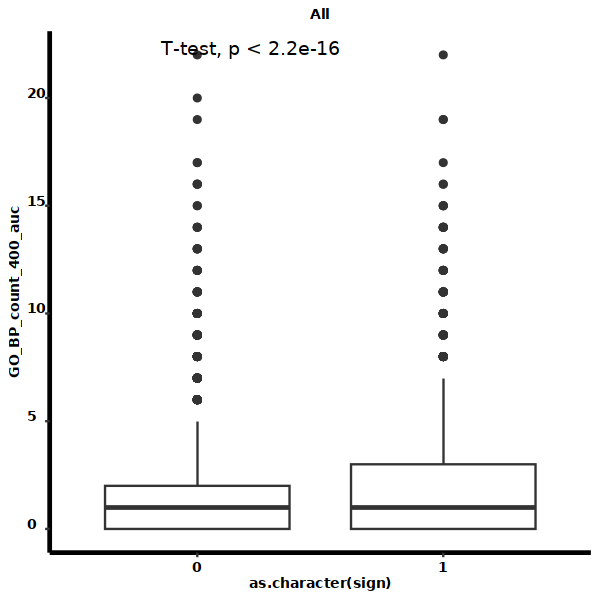

In [196]:
options(repr.plot.width = 5, repr.plot.height = 5)
go_all_counts_plot = ggplot(coegene_data, aes(x=as.character(sign), y=GO_BP_count_400_auc)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + ggtitle(cell_type)# + ylim(0,25)
go_all_counts_plot

In [197]:
pdf(paste0('figures/I2/I2_Go_Plot_Counts_', cell_type, '.pdf'), width =3, height = 3)
go_all_counts_plot
dev.off()

pdf 
  2

In [198]:
### Deciles of the go Counts

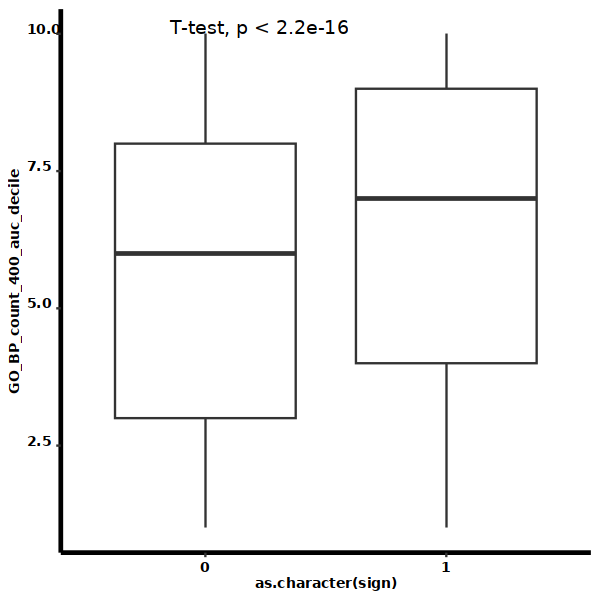

In [199]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=GO_BP_count_400_auc_decile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")# + ylim(0,25)

In [200]:
unique(coegene_data$GO_BP_count_400_auc_decile)

[1]  4  9  5  2  1  3  6 10  8  7

In [201]:
### Percentage of genes per GO_BP count cat

In [202]:
quant_eval = coegene_data %>% group_by(sign, GO_BP_count_400_auc_decile) %>% summarise(amount_genes = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [203]:
#quant_eval

In [204]:
quant_eval = quant_eval %>% group_by(sign) %>% mutate(total_genes = sum(amount_genes))

In [205]:
quant_eval$percentage = quant_eval$amount_genes/ quant_eval$total_genes

In [206]:
quant_eval$sign = as.character(quant_eval$sign)

In [207]:
quant_eval

sign,GO_BP_count_400_auc_decile,amount_genes,total_genes,percentage
<chr>,<int>,<int>,<int>,<dbl>
0,1,704,7050,0.09985816
0,2,823,7050,0.11673759
0,3,675,7050,0.09574468
0,4,575,7050,0.08156028
0,5,697,7050,0.09886525
0,6,809,7050,0.11475177
0,7,630,7050,0.08936170
0,8,754,7050,0.10695035
0,9,714,7050,0.10127660


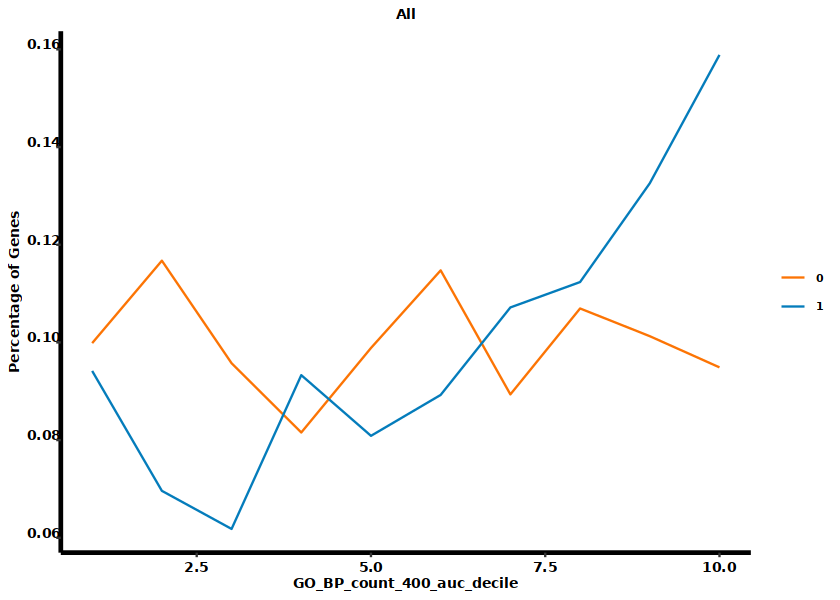

In [208]:
options(repr.plot.width = 7, repr.plot.height = 5)
go_plot = ggplot(quant_eval, aes(x=GO_BP_count_400_auc_decile, y=percentage, color =sign)) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('GO_BP_count_400_auc_decile') + ylab('Percentage of Genes')
go_plot

In [209]:
pdf(paste0('figures/I2/I2_Go_Plot_', cell_type, '.pdf'), width =3.5, height = 2)
go_plot
dev.off()

pdf 
  2

In [210]:
### Perform an enrichment test for each quantile

In [211]:
quant_eval$amount_neg_genes = quant_eval$total_genes - quant_eval$amount_genes

In [212]:
quant_eval %>% arrange(-as.numeric(sign))

sign,GO_BP_count_400_auc_decile,amount_genes,total_genes,percentage,amount_neg_genes
<chr>,<int>,<int>,<int>,<dbl>,<int>
1,1,326,3462,0.09416522,3136
1,2,241,3462,0.06961294,3221
1,3,214,3462,0.06181398,3248
1,4,323,3462,0.09329867,3139
1,5,280,3462,0.08087811,3182
1,6,309,3462,0.08925477,3153
1,7,371,3462,0.10716349,3091
1,8,389,3462,0.11236280,3073
1,9,459,3462,0.13258232,3003


In [213]:
contingency_table_data = data.frame()
odds_ratio_result = data.frame()

In [214]:
for(i in unique(quant_eval$GO_BP_count_400_auc_decile)){
    quant_eval = quant_eval %>% arrange(-as.numeric(sign))
    contingency_table = quant_eval[quant_eval$GO_BP_count_400_auc_decile == i, c('amount_genes', 'amount_neg_genes', 'GO_BP_count_400_auc_decile')]
    if(nrow(contingency_table) == 2){
    contingency_table$GO_BP_count_400_auc_decile = NULL
    print(contingency_table)
    contingency_table = as.matrix (contingency_table)
    
    result = fisher.test(contingency_table)
    print(i)
    print(result)
        
    ## save the data
    contingency_table = as.data.frame(contingency_table)
    contingency_table$is_coeqtl = c(1,0)
    contingency_table$GO_BP_count_400_auc_decile =i
    contingency_table_data = rbind(contingency_table_data, contingency_table)
        
        
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1])
    or_result$GO_BP_count_400_auc_decile = i
    odds_ratio_result = rbind(odds_ratio_result, or_result)
        }}

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          326             3136
2          704             6346
[1] 1

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.3643
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8135677 1.0776666
sample estimates:
odds ratio 
 0.9370634 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          241             3221
2          823             6227
[1] 2

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 1.029e-14
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4853345 0.6586060
sample estimates:
odds ratio 
 0.5661448 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          214             3248
2          675             6375
[1] 3

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 

In [215]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,GO_BP_count_400_auc_decile
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
odds ratio,3.643040e-01,0.9370634,1.0776666,0.8135677,1
odds ratio1,1.029107e-14,0.5661448,0.6586060,0.4853345,2
odds ratio2,2.157261e-09,0.6222897,0.7311689,0.5280157,3
odds ratio3,4.498276e-02,1.1587049,1.3392770,1.0012464,4
odds ratio4,2.678252e-03,0.8020957,0.9289172,0.6911807,5
odds ratio5,6.092291e-05,0.7560613,0.8691911,0.6564269,6
odds ratio6,3.739294e-03,1.2230729,1.4029080,1.0653008,7
odds ratio7,4.047751e-01,1.0570069,1.2054064,0.9258843,8
odds ratio8,2.368494e-06,1.3563688,1.5395547,1.1940734,9


In [216]:
### Plot the odds ratio result

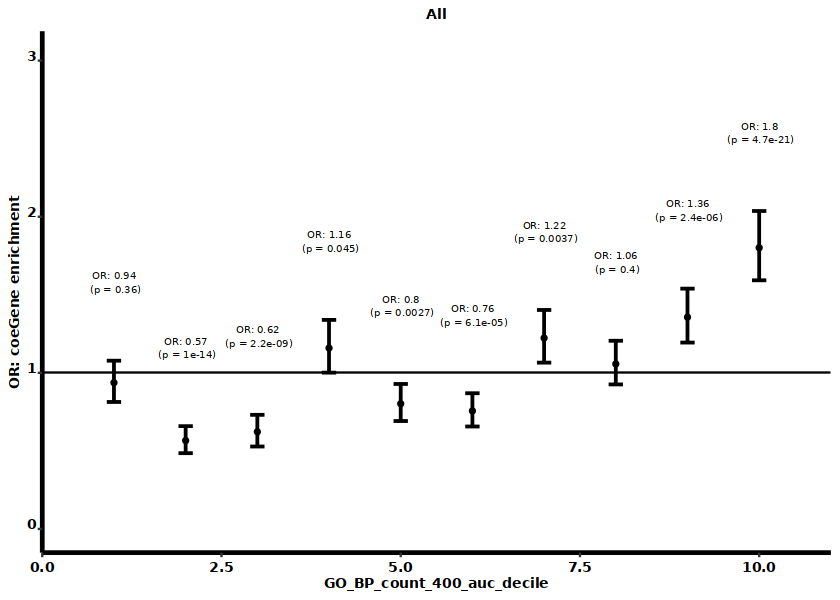

In [217]:
options(repr.plot.width = 7, repr.plot.height = 5)
or_plot = ggplot(odds_ratio_result, aes(x = GO_BP_count_400_auc_decile, y = estimate )) +
geom_point(size = 1) + geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2)  +                           # Plot points
geom_errorbar(aes(ymin = conf_lower, 
                ymax = conf_upper), 
            width = 0.2, size = 0.8) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_result$conf_upper) + 1) + ggtitle(cell_type) + plot_config + xlab('GO_BP_count_400_auc_decile') + xlim(0.5, max(odds_ratio_result$GO_BP_count_400_auc_decile) +0.5) + ylab('OR: coeGene enrichment')# + theme(axis.title.y = element_blank(), axis.title.x = element_blank())
or_plot

In [218]:
pdf(paste0('figures/I2/I2_GO_enricment_', cell_type, '.pdf'), width =4, height = 2)
or_plot
dev.off()

pdf 
  2

In [219]:
### Add enrichment to line plot

In [220]:
quant_eval = merge(quant_eval, odds_ratio_result, by.x = 'GO_BP_count_400_auc_decile', by.y = 'GO_BP_count_400_auc_decile')

In [221]:
quant_eval$label = NA
quant_eval$label[(quant_eval$p_value < 0.05) & (quant_eval$sign == 1)] ='*'
quant_eval$label[(quant_eval$p_value < 0.01) & (quant_eval$sign == 1)] ='**'
quant_eval$label[(quant_eval$p_value < 0.001) & (quant_eval$sign == 1)] ='***'

In [222]:
#quant_eval

Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_text()`)."


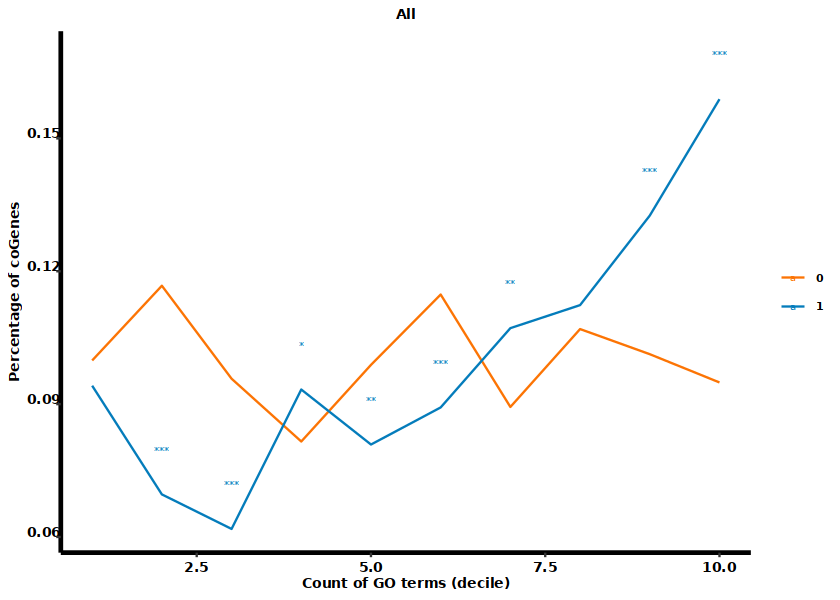

In [223]:
options(repr.plot.width = 7, repr.plot.height = 5)
go_plot = ggplot(quant_eval, aes(x=GO_BP_count_400_auc_decile, y=percentage, color =sign)) +   geom_text(aes(label = label, y = percentage+ 0.01), size = 2) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Count of GO terms (decile)') + ylab('Percentage of coGenes')
go_plot

In [224]:
pdf(paste0('figures/I2/I2_Go_Plot_', cell_type, '.pdf'), width =3.5, height = 1.5)
go_plot
dev.off()

Warning message:
"Removed 12 rows containing missing values or values outside the scale range
(`geom_text()`)."


pdf 
  2

In [225]:
### Save the data for the plot

In [226]:
write.csv(quant_eval, paste0('figures/I2/I2_Go_Plot_', cell_type, '_data.csv'))

In [227]:
head(quant_eval,2)

,GO_BP_count_400_auc_decile,sign,amount_genes,total_genes,percentage,amount_neg_genes,p_value,estimate,conf_upper,conf_lower,label
,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,1,326,3462,0.09416522,3136,0.364304,0.9370634,1.077667,0.8135677,NA
2,1,0,704,7050,0.09985816,6346,0.364304,0.9370634,1.077667,0.8135677,NA


## GnomAD Features

In [718]:
coegene_data$sign = as.numeric(coegene_data$sign)

In [719]:
### pLI score from gnomAD

In [720]:
coegene_data$high_pli = 1
coegene_data$high_pli[coegene_data$pLI < 0.9] = 0

In [721]:
### Calculate proportion of high PLI gene

In [722]:
pli_prop = coegene_data %>% group_by(sign, high_pli) %>% summarise(amount_cat = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [723]:
pli_prop = pli_prop %>% dcast(sign ~ high_pli, value.var = 'amount_cat')

In [724]:
colnames(pli_prop) = c('sign', 'low_pli', 'high_pli')

In [725]:
pli_prop$percentage = pli_prop$high_pli/(pli_prop$low_pli + pli_prop$high_pli)

In [726]:
pli_prop

sign,low_pli,high_pli,percentage
<dbl>,<int>,<int>,<dbl>
0,6089,1885,0.2363933
1,440,144,0.2465753


In [727]:
### Do enrichment test with OR

In [728]:
contingency_table = pli_prop[,c( 'high_pli','low_pli', 'sign')] %>% arrange(-sign)
contingency_table$sign = NULL

In [729]:
contingency_table = as.matrix (contingency_table)

result = fisher.test(contingency_table)
print(result)

## save the data
contingency_table = as.data.frame(contingency_table)
contingency_table$is_coeqtl = c(1,0)


or_result = data.frame(p_value = result$p.value,
                       estimate = result$estimate,
                       conf_upper = result$conf.int[2],
                       conf_lower = result$conf.int[1])


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.5794
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8635071 1.2883933
sample estimates:
odds ratio 
  1.057167 



In [730]:
or_result

,p_value,estimate,conf_upper,conf_lower
,<dbl>,<dbl>,<dbl>,<dbl>
odds ratio,0.5794074,1.057167,1.288393,0.8635071


Warning message:
"Use of `pli_prop$percentage` is discouraged.
ℹ Use `percentage` instead."


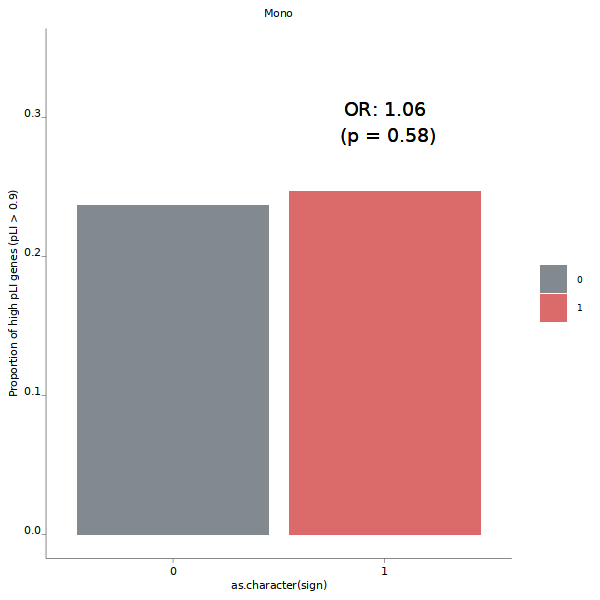

In [731]:
options(repr.plot.width = 5, repr.plot.height = 5)
pli_plot = ggplot(pli_prop, aes(x=as.character(sign), y=percentage, fill = as.character(sign))) + coeqtl_fill  +geom_bar(stat = "identity") + geom_text(aes(x = '1', y = max(pli_prop$percentage + 0.05),  label =paste0('OR: ', round(or_result$estimate, 2), "\n", ' (p = ', signif(or_result$p_value, digits = 2), ')'))) +
           ylab('Proportion of high pLI genes (pLI > 0.9)') + plot_config + ylim(0, max(pli_prop$percentage) + 0.1) + ggtitle(cell_type)
pli_plot

In [732]:
pdf(paste0('figures/I2/I2_High_PLI_Score_', cell_type, '.pdf'), width =3, height = 3)
pli_plot
dev.off()

Warning message:
"Use of `pli_prop$percentage` is discouraged.
ℹ Use `percentage` instead."


pdf 
  2

In [733]:
### Plot PLI score as boxplot

Warning message:
"Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 71 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


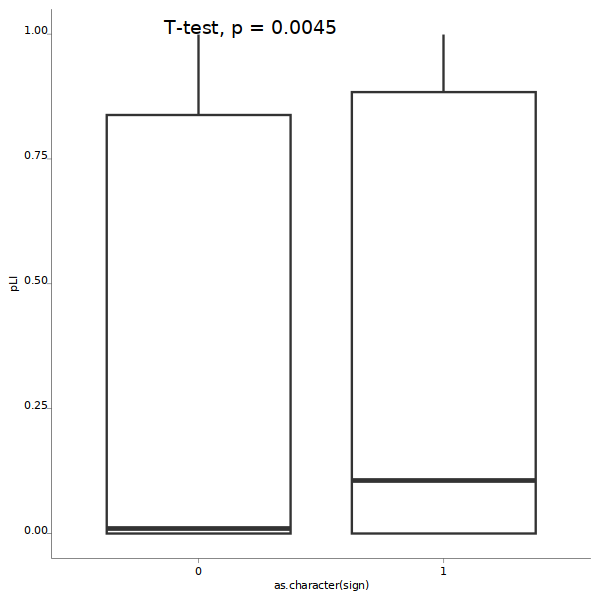

In [734]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=pLI)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [735]:
### LOEUF score from gnomAD

In [736]:
t_result <- t.test(LOEUF ~ sign, data = coegene_data)

In [737]:
t_result$p.value

[1] 0.2229411

Warning message:
"Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 71 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


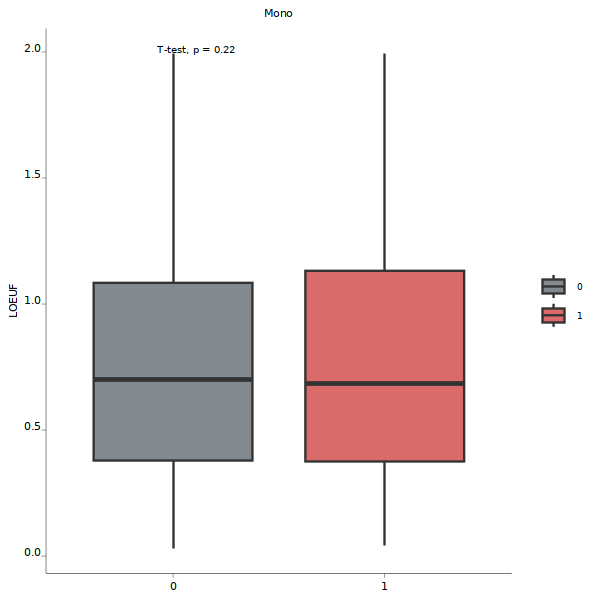

In [738]:
options(repr.plot.width = 5, repr.plot.height = 5)
loeuf_plot = ggplot(coegene_data, aes(x=as.character(sign), y=LOEUF, fill = as.character(sign))) +  coeqtl_fill + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test", size = 2) + ggtitle(cell_type) + theme(axis.title.x = element_blank())
loeuf_plot

In [739]:
pdf(paste0('figures/I2/I2_LOEUF_Score_', cell_type, '.pdf'), width =2, height = 1.8)
loeuf_plot
dev.off()

Warning message:
"Removed 71 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 71 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


pdf 
  2

In [740]:
### Save data for LOEUF score

In [741]:
write.csv(coegene_data[,c('coeGene', 'sign', 'LOEUF')], paste0('figures/I2/I2_LOEUF_Score_', cell_type, '_data.csv'))

## Saha et al connectedness

In [228]:
# decile of the connectedness score computed using co-expression networks inferred by Saha et al., Genome Research 2017 

In [229]:
colnames(coegene_data)

[1] "coeGene"                    "hgnc_id"                   
 [3] "sign"                       "GeneSymbol"                
 [5] "TSSD"                       "length"                    
 [7] "CDS_length"                 "pLI"                       
 [9] "LOEUF"                      "ABC_count"                 
[11] "ABC_length_per_type"        "Roadmap_count"             
[13] "Roadmap_length_per_type"    "promoter_count"            
[15] "connect_decile"             "connect_quantile"          
[17] "connectedness"              "PPI_degree_decile"         
[19] "PPI_degree_quantile"        "PPI_degree_cat"            
[21] "TF"                         "HI"                        
[23] "hs"                         "GO_BP_count"               
[25] "GO_BP_count_400_auc"        "GO_BP_count_400_auc_decile"
[27] "weighted_mean_expression"   "high_pli"

In [230]:
unique(coegene_data$connectedness)

[1] 0 1

In [231]:
unique(coegene_data$connect_decile)

[1]  0 10  6  3  8  9  1  4  7  2  5

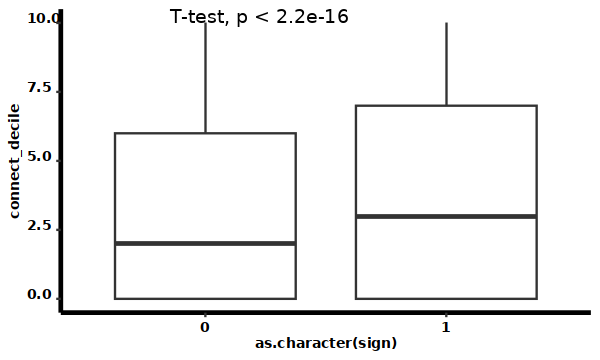

In [232]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(coegene_data, aes(x=as.character(sign), y=connect_decile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [233]:
### Quantile score

In [234]:
unique(coegene_data$connect_quantile)

[1] 0 5 3 2 4 1

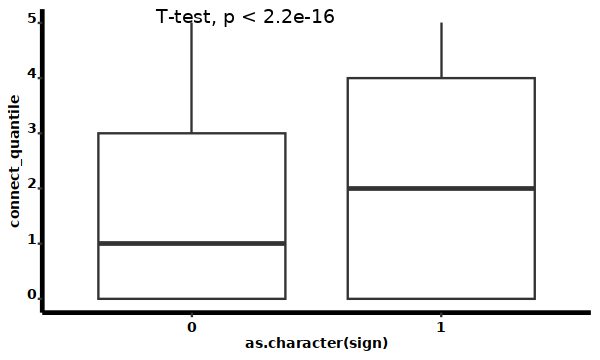

In [235]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(coegene_data, aes(x=as.character(sign), y=connect_quantile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [236]:
### Percentage of genes per connectednes quantile

In [237]:
quant_eval = coegene_data %>% group_by(sign, connect_quantile) %>% summarise(amount_genes = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [238]:
#quant_eval

In [239]:
quant_eval = quant_eval %>% group_by(sign) %>% mutate(total_genes = sum(amount_genes))

In [240]:
quant_eval$percentage = quant_eval$amount_genes/ quant_eval$total_genes

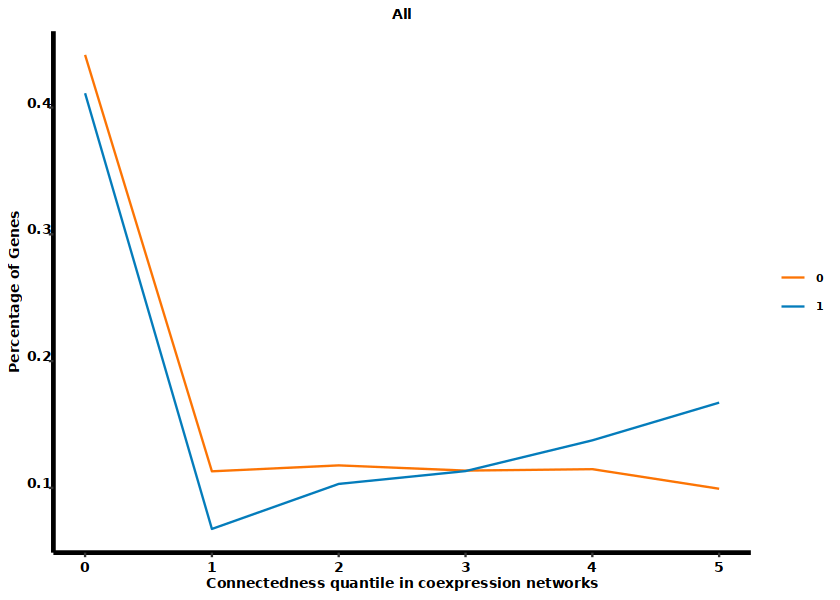

In [241]:
options(repr.plot.width = 7, repr.plot.height = 5)
connect_quantile_plot = ggplot(quant_eval, aes(x=connect_quantile, y=percentage, color = as.character(sign))) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Connectedness quantile in coexpression networks') + ylab('Percentage of Genes')
connect_quantile_plot

In [242]:
pdf(paste0('figures/I2/I2_Connectedness_quant_coexpression_', cell_type, '.pdf'), width =3.5, height = 1.5)
connect_quantile_plot
dev.off()

pdf 
  2

In [243]:
### Perform an enrichment test for each quantile

In [244]:
quant_eval$amount_neg_genes = quant_eval$total_genes - quant_eval$amount_genes

In [245]:
quant_eval %>% arrange(-sign)

sign,connect_quantile,amount_genes,total_genes,percentage,amount_neg_genes
<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,0,1424,3462,0.41132293,2038
1,1,234,3462,0.06759099,3228
1,2,357,3462,0.10311958,3105
1,3,392,3462,0.11322935,3070
1,4,476,3462,0.13749278,2986
1,5,579,3462,0.16724437,2883
0,0,3113,7050,0.44156028,3937
0,1,797,7050,0.11304965,6253
0,2,830,7050,0.11773050,6220


In [246]:
contingency_table_data = data.frame()
odds_ratio_result = data.frame()

In [247]:
for(i in unique(quant_eval$connect_quantile)){
    quant_eval = quant_eval %>% arrange(-sign)
    contingency_table = quant_eval[quant_eval$connect_quantile == i, c('amount_genes', 'amount_neg_genes', 'connect_quantile')]
    if(nrow(contingency_table) == 2){
    contingency_table$connect_quantile = NULL
    print(contingency_table)
    contingency_table = as.matrix (contingency_table)
    
    result = fisher.test(contingency_table)
    #print(i)
    #print(result)
        
    ## save the data
    contingency_table = as.data.frame(contingency_table)
    contingency_table$is_coeqtl = c(1,0)
    contingency_table$connect_quantile = i
    contingency_table_data = rbind(contingency_table_data, contingency_table)
        
        
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1])
    or_result$connect_quantile = i
    odds_ratio_result = rbind(odds_ratio_result, or_result)
        }}

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1         1424             2038
2         3113             3937
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          234             3228
2          797             6253
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          357             3105
2          830             6220
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          392             3070
2          801             6249
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          476             2986
2          809             6241
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          579             2883
2          700             6350


In [248]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,connect_quantile
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
odds ratio,3.355505e-03,0.8836853,0.9603774,0.8130324,0
odds ratio1,3.887462e-14,0.5687670,0.6630212,0.4865118,1
odds ratio2,2.581794e-02,0.8616138,0.9840508,0.7533786,2
odds ratio3,9.739065e-01,0.9961525,1.1342990,0.8738318,3
odds ratio4,9.790452e-04,1.2297171,1.3905608,1.0867565,4
odds ratio5,1.142908e-22,1.8217986,2.0544504,1.6148924,5


In [249]:
### Plot the odds ratio result

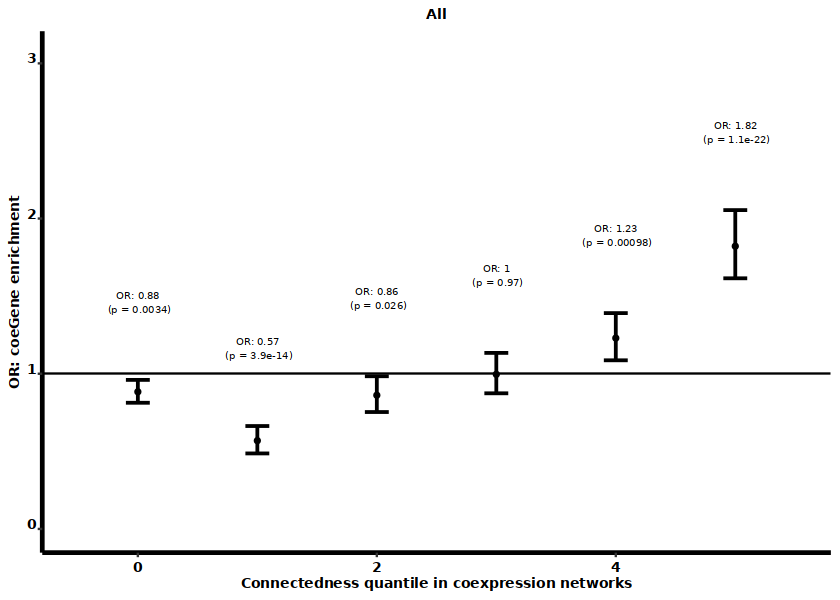

In [250]:
options(repr.plot.width = 7, repr.plot.height = 5)
or_plot = ggplot(odds_ratio_result, aes(x = connect_quantile, y = estimate )) +
geom_point(size = 1) + geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2)  +                           # Plot points
geom_errorbar(aes(ymin = conf_lower, 
                ymax = conf_upper), 
            width = 0.2, size = 0.8) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_result$conf_upper) + 1) + ggtitle(cell_type) + plot_config + xlab('Connectedness quantile in coexpression networks') + xlim(-0.5, max(odds_ratio_result$connect_quantile) +0.5) + ylab('OR: coeGene enrichment')# + theme(axis.title.y = element_blank(), axis.title.x = element_blank())
or_plot

In [251]:
pdf(paste0('figures/I2/I2_OR_Connectedness_quant_coexpression_', cell_type, '.pdf'), width =3.5, height = 2)
or_plot
dev.off()

pdf 
  2

In [252]:
### Add enrichment to connectedness line plto

In [253]:
quant_eval = merge(quant_eval, odds_ratio_result, by.x = 'connect_quantile', by.y = 'connect_quantile')

In [254]:
quant_eval$label = NA
quant_eval$label[(quant_eval$p_value < 0.05) & (quant_eval$sign == 1)] ='*'
quant_eval$label[(quant_eval$p_value < 0.01) & (quant_eval$sign == 1)] ='**'
quant_eval$label[(quant_eval$p_value < 0.001) & (quant_eval$sign == 1)] ='***'

In [255]:
#quant_eval

Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_text()`)."


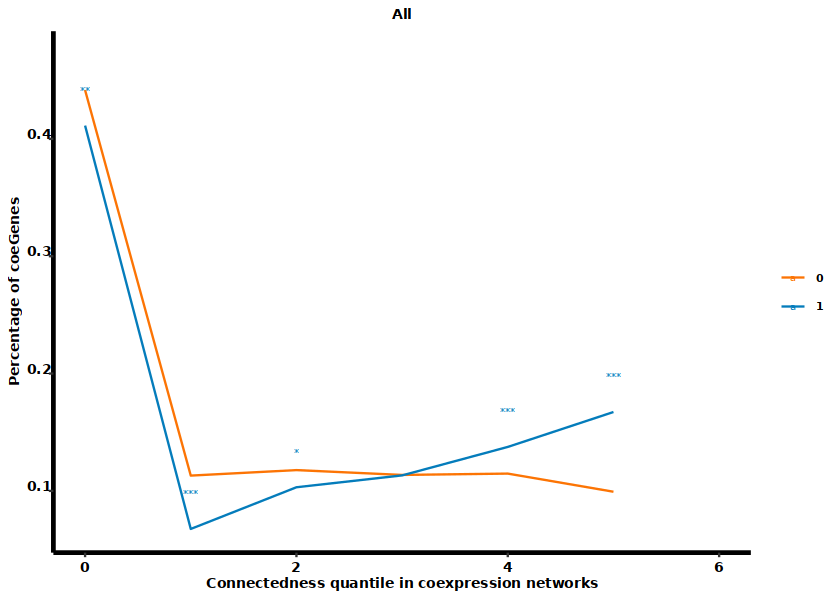

In [256]:
options(repr.plot.width = 7, repr.plot.height = 5)
connect_quantile_plot = ggplot(quant_eval, aes(x=connect_quantile, y=percentage, color = as.character(sign))) +   geom_text(aes(label = label, y = percentage+ 0.03), size = 2)  +
  geom_line() + theme(text = element_text(size = 20)) + xlim(0, max(quant_eval$connect_quantile) + 1) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Connectedness quantile in coexpression networks') + ylab('Percentage of coeGenes')
connect_quantile_plot

In [257]:
pdf(paste0('figures/I2/I2_Connectedness_quant_coexpression_', cell_type, '.pdf'), width =3.5, height = 1.5)
connect_quantile_plot
dev.off()

Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_text()`)."


pdf 
  2

In [258]:
### Save the data for the plot

In [259]:
write.csv(quant_eval, paste0('figures/I2/I2_Connectedness_quant_coexpression_', cell_type, '_data.csv'))

## Connectedness InWeb PPI networks

In [260]:
### Decile of connectedness

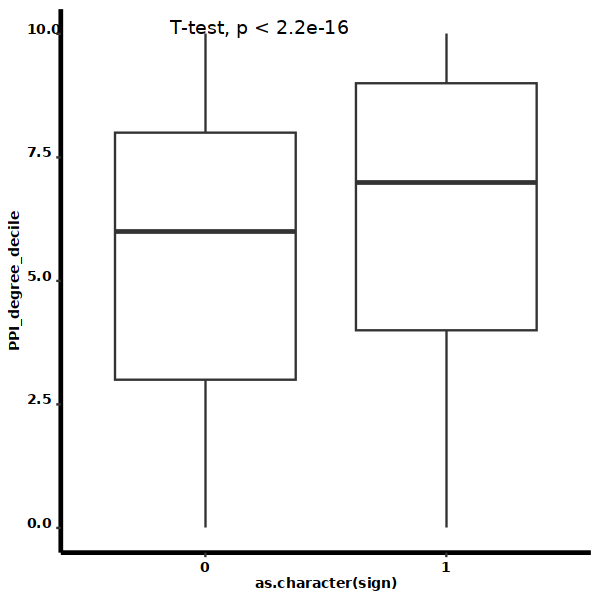

In [261]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=PPI_degree_decile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [262]:
### Quantile of connectedness

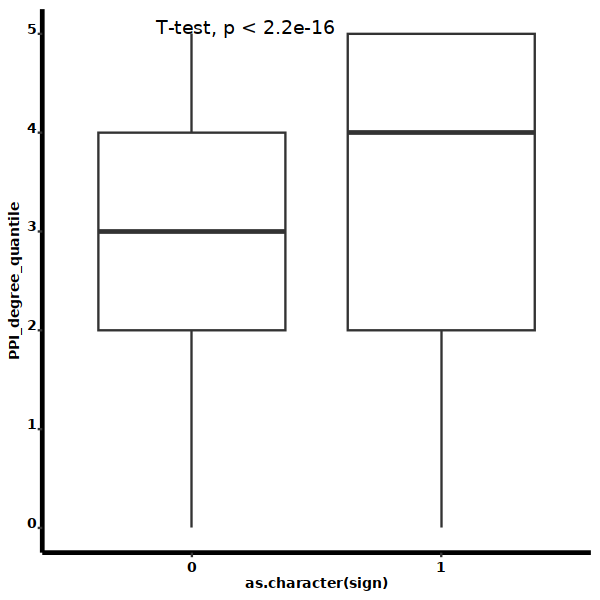

In [263]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=PPI_degree_quantile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [264]:
### Percentage of genes per connectednes quantile

In [265]:
quant_eval = coegene_data %>% group_by(sign, PPI_degree_quantile) %>% summarise(amount_genes = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [266]:
#quant_eval

In [267]:
quant_eval = quant_eval %>% group_by(sign) %>% mutate(total_genes = sum(amount_genes))

In [268]:
quant_eval$percentage = quant_eval$amount_genes/ quant_eval$total_genes

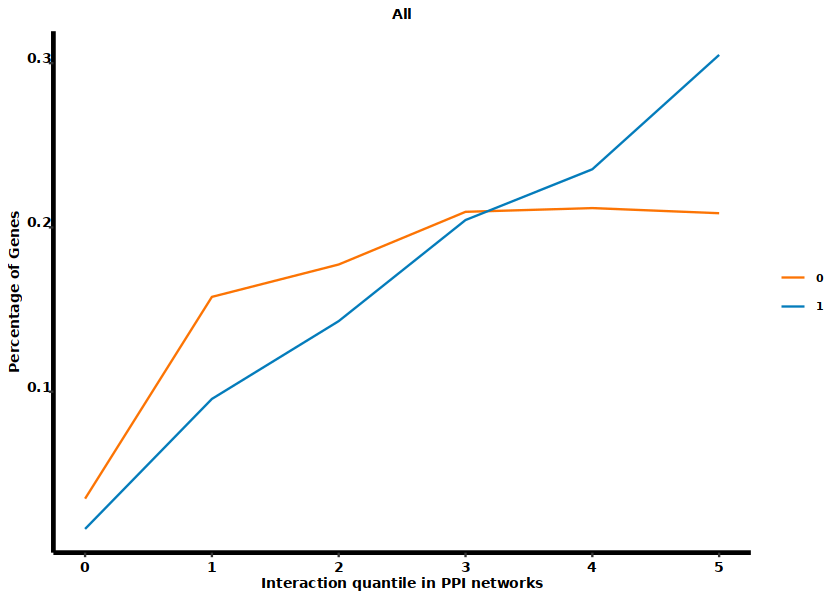

In [269]:
options(repr.plot.width = 7, repr.plot.height = 5)
connect_quantile_plot_ppi = ggplot(quant_eval, aes(x=PPI_degree_quantile, y=percentage, color = as.character(sign))) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Interaction quantile in PPI networks') + ylab('Percentage of Genes')
connect_quantile_plot_ppi

In [270]:
pdf(paste0('figures/I2/I2_Connectedness_quant_PPI_', cell_type, '.pdf'), width =3.5, height = 2)
connect_quantile_plot_ppi
dev.off()

pdf 
  2

In [271]:
### Perform an enrichment test for each quantile

In [272]:
quant_eval$amount_neg_genes = quant_eval$total_genes - quant_eval$amount_genes

In [273]:
quant_eval %>% arrange(-sign)

sign,PPI_degree_quantile,amount_genes,total_genes,percentage,amount_neg_genes
<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,0,57,3462,0.01646447,3405
1,1,331,3462,0.09560947,3131
1,2,495,3462,0.14298094,2967
1,3,708,3462,0.20450607,2754
1,4,815,3462,0.23541306,2647
1,5,1056,3462,0.30502600,2406
0,0,246,7050,0.03489362,6804
0,1,1112,7050,0.15773050,5938
0,2,1251,7050,0.17744681,5799


In [274]:
contingency_table_data = data.frame()
odds_ratio_result = data.frame()

In [275]:
for(i in unique(quant_eval$PPI_degree_quantile)){
    quant_eval = quant_eval %>% arrange(-sign)
    contingency_table = quant_eval[quant_eval$PPI_degree_quantile == i, c('amount_genes', 'amount_neg_genes', 'PPI_degree_quantile')]
    if(nrow(contingency_table) == 2){
    contingency_table$PPI_degree_quantile = NULL
    print(contingency_table)
    contingency_table = as.matrix (contingency_table)
    
    result = fisher.test(contingency_table)
    print(i)
    print(result)
        
    ## save the data
    contingency_table = as.data.frame(contingency_table)
    contingency_table$is_coeqtl = c(1,0)
    contingency_table$PPI_degree_quantile = i
    contingency_table_data = rbind(contingency_table_data, contingency_table)
        
        
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1])
    or_result$PPI_degree_quantile = i
    odds_ratio_result = rbind(odds_ratio_result, or_result)
        }}

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           57             3405
2          246             6804
[1] 0

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 3.731e-08
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3398223 0.6218919
sample estimates:
odds ratio 
 0.4630359 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          331             3131
2         1112             5938
[1] 1

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4941024 0.6437959
sample estimates:
odds ratio 
 0.5645513 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          495             2967
2         1251             5799
[1] 2

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value =

In [276]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,PPI_degree_quantile
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
odds ratio,3.730608e-08,0.4630359,0.6218919,0.3398223,0
odds ratio1,5.563424e-19,0.5645513,0.6437959,0.4941024,1
odds ratio2,7.065079e-06,0.7733819,0.8669738,0.6892040,2
odds ratio3,5.565480e-01,0.9700139,1.0737619,0.8758363,3
odds ratio4,6.282854e-03,1.1459764,1.2641357,1.0384735,4
odds ratio5,8.655786e-27,1.6645946,1.8275306,1.5159188,5


In [277]:
### Plot the odds ratio result

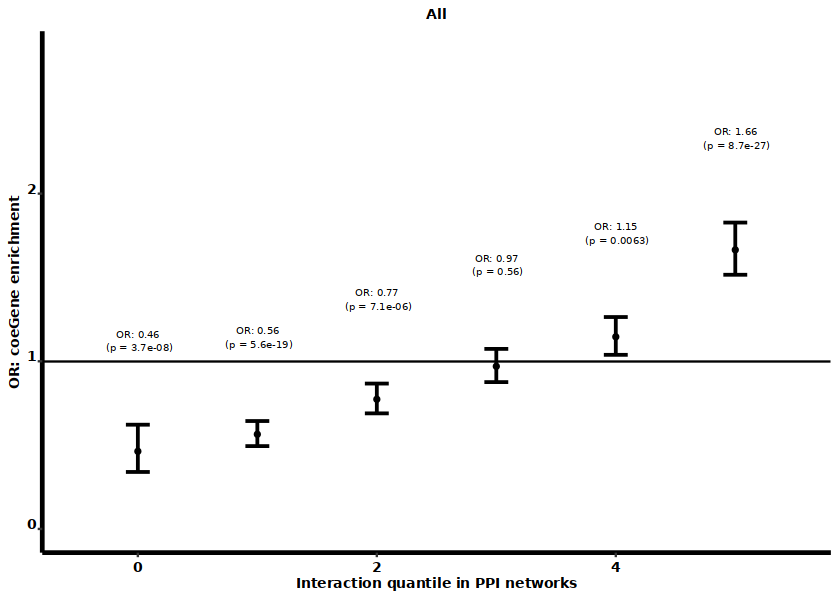

In [278]:
options(repr.plot.width = 7, repr.plot.height = 5)
or_plot = ggplot(odds_ratio_result, aes(x =PPI_degree_quantile, y = estimate )) +
geom_point(size = 1) + geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2)  +                           # Plot points
geom_errorbar(aes(ymin = conf_lower, 
                ymax = conf_upper), 
            width = 0.2, size = 0.8) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_result$conf_upper) + 1) + ggtitle(cell_type) + plot_config + xlab('Interaction quantile in PPI networks') + xlim(-0.5, max(odds_ratio_result$PPI_degree_quantile) +0.5) + ylab('OR: coeGene enrichment')# + theme(axis.title.y = element_blank(), axis.title.x = element_blank())
or_plot

In [279]:
pdf(paste0('figures/I2/I2_OR_Connectedness_quant_PPI_', cell_type, '.pdf'), width =3.5, height = 2)
or_plot
dev.off()

pdf 
  2

In [280]:
### Add enrichment to connectedness line plto

In [281]:
quant_eval = merge(quant_eval, odds_ratio_result, by.x = 'PPI_degree_quantile', by.y = 'PPI_degree_quantile')

In [282]:
quant_eval$label = NA
quant_eval$label[(quant_eval$p_value < 0.05) & (quant_eval$sign == 1)] ='*'
quant_eval$label[(quant_eval$p_value < 0.01) & (quant_eval$sign == 1)] ='**'
quant_eval$label[(quant_eval$p_value < 0.001) & (quant_eval$sign == 1)] ='***'

In [283]:
#quant_eval

Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_text()`)."


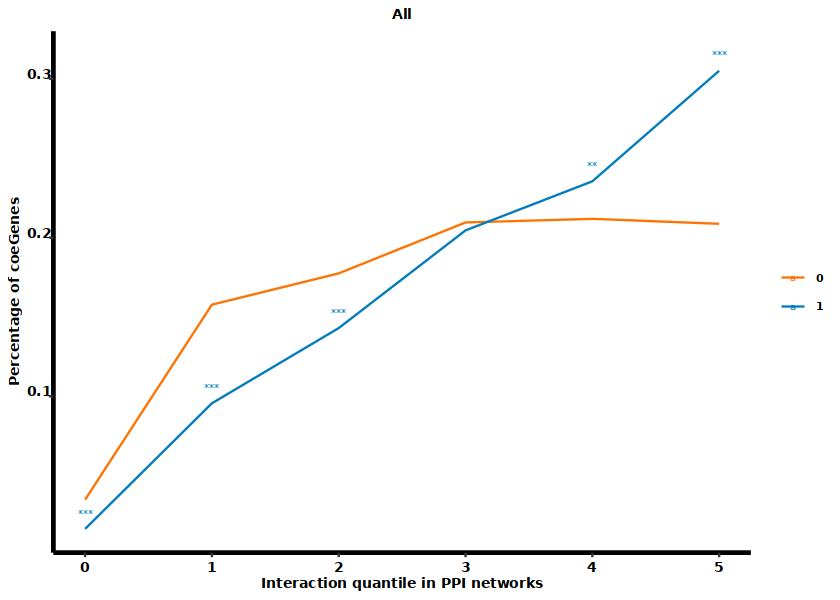

In [284]:
options(repr.plot.width = 7, repr.plot.height = 5)
connect_quantile_plot_ppi = ggplot(quant_eval, aes(x=PPI_degree_quantile, y=percentage, color = as.character(sign))) + geom_text(aes(label = label, y = percentage + 0.01), size = 2) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Interaction quantile in PPI networks') + ylab('Percentage of coeGenes')
connect_quantile_plot_ppi

In [285]:
pdf(paste0('figures/I2/I2_Connectedness_quant_PPI_', cell_type, '.pdf'), width =3.5, height = 1.5)
connect_quantile_plot_ppi
dev.off()

Warning message:
"Removed 7 rows containing missing values or values outside the scale range
(`geom_text()`)."


pdf 
  2

In [287]:
### Save data for plot

In [288]:
write.csv(quant_eval, paste0('figures/I2/I2_Connectedness_quant_PPI_', cell_type, '_data.csv'))

In [286]:
coegene_data %>% group_by(sign, PPI_degree_cat) %>% summarise(amounts  = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


sign,PPI_degree_cat,amounts
<dbl>,<int>,<int>
0,0,246
0,1,6804
1,0,57
1,1,3405


## Other features

### Gene density

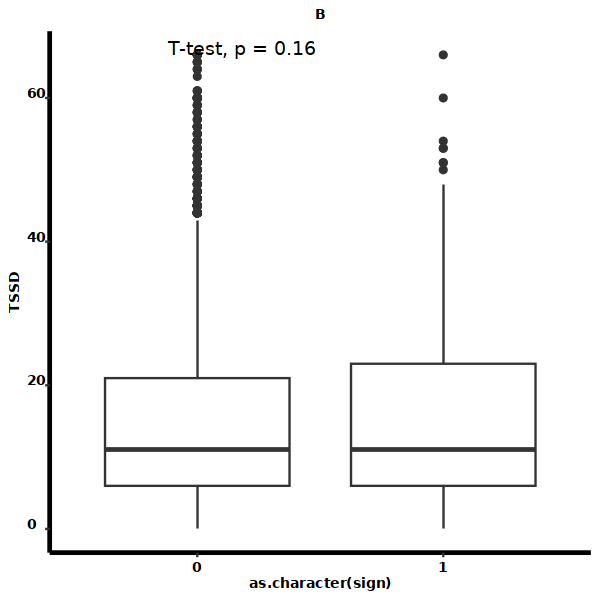

In [4829]:
# Check out the enhancer length across biosamples from Roadmap
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=TSSD)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + ggtitle(cell_type)

### Gene length

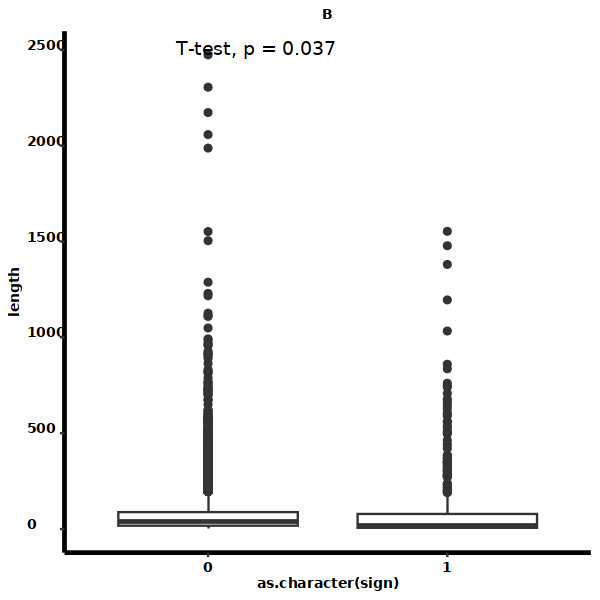

In [4830]:
# Check out the enhancer length across biosamples from Roadmap
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=length)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + ggtitle(cell_type)

In [4831]:
coegene_data %>% group_by(sign) %>% summarise(mean_length = mean(length))

sign,mean_length
<dbl>,<dbl>
0,75.5207
1,94.2346


### CDS length

In [4832]:
##length of the coding segments (in Kb)

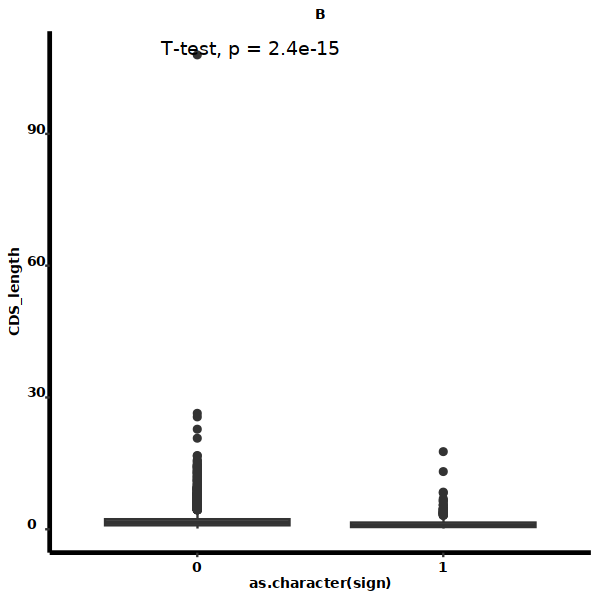

In [4833]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(coegene_data, aes(x=as.character(sign), y=CDS_length)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + ggtitle(cell_type)

In [4834]:
coegene_data %>% group_by(sign) %>% summarise(mean_length = mean(CDS_length))

sign,mean_length
<dbl>,<dbl>
0,1.911650
1,1.316697


### TF indicator

In [4835]:
amount_tfs = coegene_data %>% group_by(TF,sign) %>% summarise(amounts = n()) %>% arrange(sign)

`summarise()` has grouped output by 'TF'. You can override using the `.groups`
argument.


In [4836]:
amount_tfs

TF,sign,amounts
<int>,<dbl>,<int>
0,0,7085
1,0,652
0,1,462
1,1,20


In [4837]:
input_matrix = amount_tfs %>% dcast(TF ~ sign, value.var = 'amounts')

In [4838]:
input_matrix

TF,0,1
<int>,<int>,<int>
0,7085,462
1,652,20


In [4839]:
rownames(input_matrix) = input_matrix$TF

In [2658]:
input_matrix$TF = NULL

In [2659]:
input_matrix = as.matrix(input_matrix)

In [2660]:
input_matrix

,0,1
0,7362,550
1,612,34


In [2661]:
fisher.test(input_matrix)


	Fisher's Exact Test for Count Data

data:  input_matrix
p-value = 0.1049
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.504808 1.063902
sample estimates:
odds ratio 
 0.7436598 


In [2662]:
amount_tfs

TF,sign,amounts
<int>,<dbl>,<int>
0,0,7362
1,0,612
0,1,550
1,1,34
